<h1> <center> 7.1 - Co-voting networks </center> </h1>

**Authors:** Sebastião Rosalino, Flávio Pinheiro, António Curado

# Table of Contents

1. [Data Preparation](#Data-Preparation)
2. [Entire term](#Entire-term)
3. [Primary subjects](#Primary-subjects)
   - 3.1. [European citizenship](#European-citizenship)
   - 3.2. [Internal market, single market](#Internal-market-single-market)
   - 3.3. [Community policies](#Community-policies)
   - 3.4. [Economic, social and territorial cohesion](#Economic-social-and-territorial-cohesion)
   - 3.5. [Economic and monetary system](#Economic-and-monetary-system)
   - 3.6. [External relations of the Union](#External-relations-of-the-Union)
   - 3.7. [Area of freedom, security and justice](#Area-of-freedom-security-and-justice)
   - 3.8. [State and evolution of the Union](#State-and-evolution-of-the-Union)
4. [Secondary subjects](#Secondary-subjects)
   - 4.1. [Budget of the Union](#Budget-of-the-Union)
   - 4.2. [Common foreign and security policy (CFSP)](#Common-foreign-and-security-policy-CFSP)
   - 4.3. [Environmental policy](#Environmental-policy)
   - 4.4. [Social policy, social charter and protocol](#Social-policy-social-charter-and-protocol)
   - 4.5. [Agricultural policy and economies](#Agricultural-policy-and-economies)
   - 4.6. [Relations with third countries](#Relations-with-third-countries)
   - 4.7. [Common commercial policy in general](#Common-commercial-policy-in-general)
   - 4.8. [Information and communications in general](#Information-and-communications-in-general)

In [69]:
# Import the necessary libraries and configurations
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import community as community_louvain
import seaborn as sns

from collections import Counter

# Suppress all warnings
warnings.filterwarnings('ignore')

In [70]:
# Load all the datasets (except countries)
members = pd.read_csv("../datasets/second_stage/2_members/members.csv")
group_memberships_single = pd.read_csv("../datasets/second_stage/3_group_memberships/group_memberships_single.csv")
bills = pd.read_csv("../datasets/second_stage/6_bill_subject_assignment/bills.csv")
member_votes = pd.read_csv("../datasets/second_stage/5_member_votes/member_votes.csv")
primary_subject_bills = pd.read_csv("../datasets/second_stage/6_bill_subject_assignment/primary_subject_bills.csv")
secondary_subject_bills = pd.read_csv("../datasets/second_stage/6_bill_subject_assignment/secondary_subject_bills.csv")
tertiary_subject_bills = pd.read_csv("../datasets/second_stage/6_bill_subject_assignment/tertiary_subject_bills.csv")

In [71]:
# A reminder of how the members dataset looks like
members

,country_code,id_mep,name,full_term
0,LUX,0,Charles GOERENS,1
1,GBR,1,Bill NEWTON DUNN,0
2,DEU,2,Constanze KREHL,0
3,PRT,3,Carlos COELHO,0
4,DEU,4,Bernd LANGE,1
...,...,...,...,...
866,PRT,868,Vasco BECKER-WEINBERG,0
867,PRT,869,Ana Miguel DOS SANTOS,0
868,PRT,870,Vânia NETO,0
869,PRT,871,Teófilo SANTOS,0


In [72]:
# A reminder of how the group_memberships_single dataset looks like
group_memberships_single

,group_code,start_date,end_date,id_mep,membership_length
0,RENEW,2019-07-02,2024-07-15,0,1840
1,RENEW,2019-07-02,2020-01-31,1,213
2,SD,2019-07-02,2022-10-02,2,1188
3,EPP,2023-07-07,2024-07-15,3,374
4,SD,2019-07-02,2024-07-15,4,1840
...,...,...,...,...,...
866,EPP,2024-03-26,2024-07-15,868,111
867,EPP,2024-04-02,2024-07-15,869,104
868,EPP,2024-04-02,2024-07-15,870,104
869,EPP,2024-04-02,2024-07-15,871,104


In [73]:
# A reminder of how the bills dataset looks like
bills

,timestamp,procedure_reference,id_bill,text,subjects
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreemen...,['3.20.15.02 Air transport agreements and coop...
1,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusi...,['3.20.15.02 Air transport agreements and coop...
2,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation...,['3.20.15.02 Air transport agreements and coop...
3,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,['3.20.15.02 Air transport agreements and coop...
4,2020-06-17 23:24:52,2012/0006(NLE),198,eumoldova common aviation area agreement,['3.20.15.02 Air transport agreements and coop...
...,...,...,...,...,...
1898,2024-04-25 12:20:42,2024/2698(RSP),1898,european parliament resolution azerbaijan nota...,"['6.10.08 Fundamental freedoms, human rights, ..."
1899,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal ...,"[""4.10.03 Child protection, children's rights""..."
1900,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution,"['6.10.08 Fundamental freedoms, human rights, ..."
1901,2024-04-25 12:58:39,2024/2704(RSP),1899,irans unprecedented attack israel need de-esca...,"['6.10.04 Third-country political situation, l..."


In [74]:
# A reminder of how the member_votes dataset looks like
member_votes

,position,country_code,group_code,id_mep,id_bill
0,FOR,LUX,RENEW,0,0
1,FOR,GBR,RENEW,1,0
2,DID_NOT_VOTE,DEU,SD,2,0
3,FOR,DEU,SD,4,0
4,FOR,DEU,SD,5,0
...,...,...,...,...,...
1345669,DID_NOT_VOTE,PRT,EPP,868,1902
1345670,DID_NOT_VOTE,PRT,EPP,869,1902
1345671,DID_NOT_VOTE,PRT,EPP,870,1902
1345672,FOR,PRT,EPP,871,1902


## 1. Data Preparation
<a id="Data-Preparation"></a>

In [75]:
# Count the total number of bills
total_bills = bills.shape[0]

# Count the number of actual votes (excluding "DID_NOT_VOTE") for each MEP
valid_votes = member_votes[member_votes["position"] != "DID_NOT_VOTE"].groupby("id_mep").size()

# Identify MEPs who have voted in at least 50% of all bills
meps_to_be_kept = list(valid_votes[valid_votes >= 0.5 * total_bills].index)

# Visualize the MEPs IDs to be kept
meps_to_be_kept

[0,
 2,
 4,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 88,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 151,
 153,
 154,
 155,
 156,
 157,
 159,
 160,
 162,
 163,
 164,
 165,
 166,
 168,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 191,
 192,
 193,
 194,
 195,
 197,
 199,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,

In [76]:
# Check the number of MEPs to be kept
print(f'Number of MEPs to be kept: {len(meps_to_be_kept)}')

Number of MEPs to be kept: 695


In [77]:
# Replace values in the 'position' column as follows:
# FOR for "supporting"
# AGAINST, ABSTENTION and DID_NOT_VOTE for "not_supporting" 
member_votes['position'] = member_votes['position'].replace({
    'FOR': 'supporting',
    'AGAINST': 'not_supporting',
    'ABSTENTION': 'not_supporting',
    'DID_NOT_VOTE': 'not_supporting'
})

# Visualize the resulting member_votes dataset
member_votes

,position,country_code,group_code,id_mep,id_bill
0,supporting,LUX,RENEW,0,0
1,supporting,GBR,RENEW,1,0
2,not_supporting,DEU,SD,2,0
3,supporting,DEU,SD,4,0
4,supporting,DEU,SD,5,0
...,...,...,...,...,...
1345669,not_supporting,PRT,EPP,868,1902
1345670,not_supporting,PRT,EPP,869,1902
1345671,not_supporting,PRT,EPP,870,1902
1345672,supporting,PRT,EPP,871,1902


In [78]:
# Compute the absolute count of "supporting" and "not_supporting" votes for each bill
vote_counts = member_votes.groupby(['id_bill', 'position']).size().unstack(fill_value=0)

# Compute total votes per bill
vote_counts['total_votes'] = vote_counts.sum(axis=1)

# Compute the percentages of "supporting" and "not_supporting" for each bill
vote_percentages = vote_counts.div(vote_counts['total_votes'], axis=0)

# Get the minority percentage (smallest between "supporting" and "not_supporting")
vote_percentages['minority_percentage'] = vote_percentages[['supporting', 'not_supporting']].min(axis=1)

# Merge with the bills dataset, in a new column called "minority_percentage"
bills = bills.merge(vote_percentages[['minority_percentage']], left_on='id_bill', right_index=True, how='left')

# Visualize the resulting bills dataset
bills

,timestamp,procedure_reference,id_bill,text,subjects,minority_percentage
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreemen...,['3.20.15.02 Air transport agreements and coop...,0.115057
1,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusi...,['3.20.15.02 Air transport agreements and coop...,0.066667
2,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation...,['3.20.15.02 Air transport agreements and coop...,0.072443
3,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,['3.20.15.02 Air transport agreements and coop...,0.072443
4,2020-06-17 23:24:52,2012/0006(NLE),198,eumoldova common aviation area agreement,['3.20.15.02 Air transport agreements and coop...,0.071023
...,...,...,...,...,...,...
1898,2024-04-25 12:20:42,2024/2698(RSP),1898,european parliament resolution azerbaijan nota...,"['6.10.08 Fundamental freedoms, human rights, ...",0.327660
1899,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal ...,"[""4.10.03 Child protection, children's rights""...",0.241135
1900,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution,"['6.10.08 Fundamental freedoms, human rights, ...",0.397163
1901,2024-04-25 12:58:39,2024/2704(RSP),1899,irans unprecedented attack israel need de-esca...,"['6.10.04 Third-country political situation, l...",0.493617


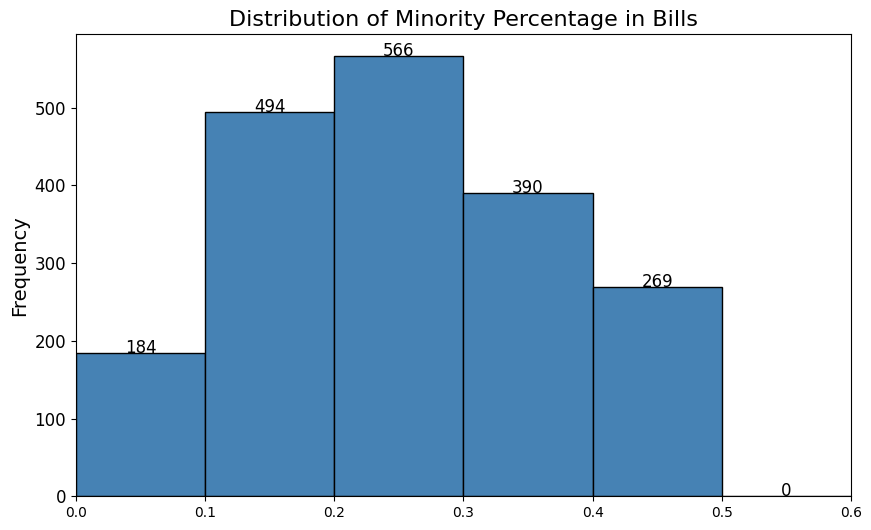

In [79]:
# Create the figure
plt.figure(figsize=(10, 6))

# Plot the histogram of the "minority percentage" column
counts, bins, patches = plt.hist(bills['minority_percentage'], bins=np.arange(0, 1.1, 0.1), 
                                 color='steelblue', edgecolor='black')

# Set y-label and title
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Minority Percentage in Bills", fontsize=16)

# Set ticks for every 0.1 bin
plt.xticks(np.arange(0, 0.7, 0.1))  
plt.yticks(fontsize=12)

# Limit x-axis to go only until 0.6
plt.xlim(0, 0.6)

# Add frequency labels on top of each bin
for count, bin_edge in zip(counts, bins[:-1]):
    if bin_edge <= 0.6:  # Only annotate bins within the x-axis limit
        plt.text(bin_edge + 0.05, count + 0.7, str(int(count)), ha='center', fontsize=12, color='black')

# Display the plot
plt.show()

In [80]:
# Store in a list all id_bill's with minority_percentage >= 0.025
bills_to_be_kept = bills.loc[bills["minority_percentage"] >= 0.025, "id_bill"].tolist()

# Visualize the list of bills to be kept
bills_to_be_kept

[200,
 786,
 201,
 203,
 198,
 789,
 204,
 1375,
 1616,
 199,
 1362,
 1363,
 1224,
 757,
 1765,
 687,
 1773,
 1836,
 1843,
 1767,
 1844,
 454,
 371,
 825,
 225,
 224,
 226,
 481,
 258,
 873,
 92,
 740,
 896,
 897,
 1391,
 1395,
 475,
 457,
 464,
 253,
 91,
 652,
 653,
 202,
 365,
 560,
 441,
 641,
 309,
 310,
 311,
 478,
 476,
 646,
 607,
 688,
 694,
 647,
 654,
 479,
 568,
 110,
 106,
 107,
 108,
 109,
 123,
 72,
 73,
 42,
 70,
 90,
 1225,
 1087,
 366,
 28,
 29,
 603,
 598,
 69,
 68,
 252,
 122,
 695,
 76,
 189,
 190,
 50,
 71,
 255,
 121,
 120,
 570,
 49,
 55,
 56,
 480,
 477,
 74,
 1157,
 191,
 27,
 129,
 128,
 31,
 25,
 26,
 312,
 67,
 192,
 127,
 130,
 318,
 319,
 313,
 75,
 356,
 505,
 390,
 360,
 3,
 14,
 133,
 632,
 7,
 6,
 5,
 8,
 53,
 52,
 30,
 4,
 15,
 16,
 180,
 150,
 156,
 151,
 154,
 185,
 182,
 152,
 153,
 160,
 171,
 158,
 166,
 181,
 147,
 143,
 176,
 155,
 134,
 163,
 162,
 145,
 148,
 179,
 178,
 157,
 144,
 175,
 183,
 146,
 159,
 177,
 170,
 184,
 172,
 174,
 139,


In [81]:
# Check the number of bills to be kept
print(f'Number of bills to be kept: {len(bills_to_be_kept)}')

Number of bills to be kept: 1890


In [82]:
# Filter the primary_subject_bills dataframe to include only rows where id_bill is in bills_to_be_kept
filtered_primary_subject_bills = primary_subject_bills[primary_subject_bills['id_bill'].isin(bills_to_be_kept)]

filtered_primary_subject_bills

,timestamp,procedure_reference,id_bill,text,subjects,primary_subject
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreemen...,3.20.15.02,Community policies
1,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreemen...,6.40.05.02,External relations of the Union
2,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusi...,3.20.15.02,Community policies
3,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation...,3.20.15.02,Community policies
4,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,3.20.15.02,Community policies
...,...,...,...,...,...,...
2505,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal ...,4.10.03,"Economic, social and territorial cohesion"
2506,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal ...,6.10.08,External relations of the Union
2507,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution,6.10.08,External relations of the Union
2508,2024-04-25 12:58:39,2024/2704(RSP),1899,irans unprecedented attack israel need de-esca...,6.10.04,External relations of the Union


In [83]:
# Get the list of MEPs whose most significant status has been as NI
ni_meps = group_memberships_single[group_memberships_single["group_code"] == "NI"]["id_mep"].tolist()

# Filter out voting records from the member_votes dataset belonging to MEPs whose most significant status has been as NI
member_votes = member_votes[~member_votes["id_mep"].isin(ni_meps)]

# Visualize the resulting member_votes dataset
member_votes

,position,country_code,group_code,id_mep,id_bill
0,supporting,LUX,RENEW,0,0
1,supporting,GBR,RENEW,1,0
2,not_supporting,DEU,SD,2,0
3,supporting,DEU,SD,4,0
4,supporting,DEU,SD,5,0
...,...,...,...,...,...
1345669,not_supporting,PRT,EPP,868,1902
1345670,not_supporting,PRT,EPP,869,1902
1345671,not_supporting,PRT,EPP,870,1902
1345672,supporting,PRT,EPP,871,1902


In [84]:
# Filter the member_votes dataset to keep only voting records belonging to MEPs who voted in at least 50% of all roll-call votes and only voting records about non high-consensual bills and 
# keep also only MEPs whose most significant status has been with a group and not as NI
member_votes = member_votes[
    (member_votes["id_bill"].isin(bills_to_be_kept)) & 
    (member_votes["id_mep"].isin(meps_to_be_kept))
]

# Visualize the resulting member_votes dataset
member_votes

,position,country_code,group_code,id_mep,id_bill
0,supporting,LUX,RENEW,0,0
2,not_supporting,DEU,SD,2,0
3,supporting,DEU,SD,4,0
5,supporting,DEU,EPP,6,0
6,supporting,DEU,EPP,7,0
...,...,...,...,...,...
1345613,supporting,DEU,EPP,811,1902
1345615,supporting,SWE,SD,813,1902
1345616,supporting,NLD,RENEW,815,1902
1345617,supporting,DEU,SD,816,1902


In [85]:
def create_agents_and_artifacts(member_votes_filtered):
    """
    Create a dataframe representing the agents and artifacts matrix where rows represent MEPs (agents) and columns represent bills (artifacts), except for the first column 
    which indicates the name of the MEP, and values are 1 if the MEP voted "supporting" on a bill, otherwise 0.

    Parameters:
    member_votes_filtered (pd.DataFrame): A dataset containing voting records with columns
                              'position', 'id_mep', and 'id_bill'.
                              
    Returns:
    pd.DataFrame: A dataframe with MEPs as rows, bills as columns, except for the first column that indicates the name of the MEP, and binary values for voting positions.
    """
    # Filter member_votes where position is 'supporting'
    member_votes_filtered['vote_supporting'] = (member_votes_filtered['position'] == 'supporting').astype(int)

    # Pivot the dataset to create the matrix
    votes_matrix = member_votes_filtered.pivot_table(
        index='id_mep',     # Rows are MEPs (agents)
        columns='id_bill',  # Columns are bills (artifacts)
        values='vote_supporting',  # Values are 1 if the position is 'supporting', otherwise 0
        fill_value=0        # Fill missing values (MEPs that weren't serving at the EP at the time of the bill) with 0
    )

    # Convert matrix values to integer type
    votes_matrix = votes_matrix.astype(int)

    # Reset the column names to 'bill_0', 'bill_1', ...
    votes_matrix.columns = [f"bill_{int(col)}" for col in votes_matrix.columns]

    # Retrieve the columns "id_mep", "name" and "country_code" from the members dataset into the members_info dataframe
    members_info = members[['id_mep', 'name', 'country_code']]

    # Merge the members_info dataframe with the group_memberships_single dataset to get the group of each MEP
    members_info = pd.merge(members_info, group_memberships_single[['id_mep', 'group_code']], on='id_mep', how='left')

    # Create the formatted name column and rename it to "name". The formatted name column will be: Name (Country-Group)
    members_info['name'] = members_info.apply(
        lambda x: f"{x['name']} ({x['country_code']}-{x['group_code']})", axis=1
    )

    # Merge the formatted name column with the votes matrix
    votes_matrix = votes_matrix.reset_index()
    votes_matrix = pd.merge(votes_matrix, members_info[['id_mep', 'name']], on='id_mep', how='left')

    # Drop the id_mep column
    votes_matrix = votes_matrix.drop(columns=['id_mep'])

    # Reorder the votes_matrix columns so that the name column comes first
    votes_matrix = votes_matrix[['name'] + [col for col in votes_matrix.columns if col != 'name']]
    
    return votes_matrix

In [86]:
def create_clean_edgelist(edgelist):
    """
    Cleans and processes a backbone edgelist by:
    - Dropping the unnecessary "weight" column.
    - Renaming columns to "Source" and "Target".
    - Removing country and group information from names coming from the agents and artifacts.
    - Replacing names with MEP IDs based on the members dataset.

    Parameters:
    edgelist (pd.DataFrame): The raw backbone edgelist.

    Returns:
    pd.DataFrame: A cleaned edgelist dataframe with MEP IDs as Source and Target.
    """

    # Drop the unnecessary "weight" column
    edgelist.drop("weight", inplace=True, axis=1)
    
    # Rename columns to "Source" and "Target"
    edgelist = edgelist.rename(columns={"from": "Source", "to": "Target"})

    # Remove country and group information from names coming from the agents and artifacts
    def clean_name(name):
        return name.split(' (')[0]

    edgelist["Source"] = edgelist["Source"].apply(clean_name)
    edgelist["Target"] = edgelist["Target"].apply(clean_name)

    # Replace names with id_mep's using the members dataset
    name_to_id = members.set_index("name")["id_mep"].to_dict()

    edgelist["Source"] = edgelist["Source"].map(name_to_id)
    edgelist["Target"] = edgelist["Target"].map(name_to_id)

    return edgelist

In [87]:
def compute_optimal_modularity(cleaned_edgelist):
    """
    Constructs a graph from the given cleaned edgelist, applies the Louvain community detection algorithm,
    and computes the modularity of the detected optimal partitions.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.

    Returns:
    - modularity (float): The modularity score of the optimal Louvain partitioning.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Apply the Louvain community detection algorithm
    partition = community_louvain.best_partition(G, random_state=22)

    # Compute the modularity of the optimal detected partition
    modularity = community_louvain.modularity(partition, G)

    return modularity

In [88]:
def compute_group_modularity(cleaned_edgelist):
    """
    Constructs a graph from the given cleaned edgelist and computes the modularity of the graph assuming predefined partitions where each community consists 
    of all MEPs from the same group.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.

    Returns:
    - modularity (float): The modularity score based on the predefined group partitions.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Create a dictionary mapping MEPs to their respective groups
    mep_to_group = dict(zip(group_memberships_single['id_mep'], group_memberships_single['group_code']))

    # Assign each node (MEP) in the graph to its corresponding group
    partition = {node: mep_to_group.get(node, "Unknown") for node in G.nodes()}

    # Compute modularity based on the predefined groups
    modularity = community_louvain.modularity(partition, G)

    return modularity

In [89]:
def compute_nationality_modularity(cleaned_edgelist):
    """
    Constructs a graph from the given cleaned edgelist and computes the modularity of the graph 
    assuming predefined partitions where each community consists of all MEPs from the same country.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.

    Returns:
    - modularity (float): The modularity score based on the predefined national partitions.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Create a dictionary mapping MEPs to their respective countries
    mep_to_country = dict(zip(members['id_mep'], members['country_code']))

    # Assign each node (MEP) in the graph to its corresponding country
    partition = {node: mep_to_country.get(node, "Unknown") for node in G.nodes()}

    # Compute modularity based on the predefined national communities
    modularity = community_louvain.modularity(partition, G)

    return modularity

In [90]:
def compute_group_assortativity(cleaned_edgelist):
    """
    Constructs a graph from the given cleaned edgelist and computes the group assortativity coefficient based on the MEP group attribute.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.

    Returns:
    - assortativity (float): The group assortativity coefficient of the network.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Create a dictionary mapping MEPs to their respective groups
    mep_to_group = dict(zip(group_memberships_single['id_mep'], group_memberships_single['group_code']))

    # Assign group as a node attribute in the graph
    nx.set_node_attributes(G, mep_to_group, 'party')

    # Compute and return the group assortativity coefficient
    assortativity = nx.attribute_assortativity_coefficient(G, 'party')

    return assortativity

In [91]:
def compute_nationality_assortativity(cleaned_edgelist):
    """
    Constructs a graph from the given cleaned edgelist and computes the nationality assortativity coefficient based on the MEP nationality attribute.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.

    Returns:
    - assortativity (float): The nationality assortativity coefficient of the network.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Create a dictionary mapping MEPs to their respective countries
    mep_to_country = dict(zip(members['id_mep'], members['country_code']))

    # Assign each node’s country as a node attribute in the graph
    nx.set_node_attributes(G, mep_to_country, 'country')

    # Compute and return the nationality assortativity coefficient
    assortativity = nx.attribute_assortativity_coefficient(G, 'country')

    return assortativity

In [92]:
def compute_average_clustering_coefficient(cleaned_edgelist):
    """
    Constructs a graph from the given cleaned edgelist and computes the average clustering coefficient.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.

    Returns:
    - avg_clustering (float): The average clustering coefficient of the graph.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Compute and return the average clustering coefficient
    avg_clustering = nx.average_clustering(G)

    return avg_clustering

In [93]:
def compute_network_density(cleaned_edgelist):
    """
    Constructs a graph from the given cleaned edgelist and computes the network density.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.

    Returns:
    - density (float): The density of the network.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Compute and return the network density
    density = nx.density(G)

    return density

In [94]:
def compute_percentage_of_remaining_nodes(cleaned_edgelist):
    """
    Constructs a graph from the given cleaned edgelist and computes the percentage of remaining nodes.
    
    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.
      
    Returns:
    - percentage_of_remaining_nodes (float): The ratio of total nodes in the network to the length of meps_to_be_kept.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Calculate and return the percentage of remaining nodes
    total_nodes_in_network = G.number_of_nodes()
    total_meps_to_keep = len(meps_to_be_kept)
    percentage_of_remaining_nodes = (total_nodes_in_network / total_meps_to_keep) * 100

    return percentage_of_remaining_nodes

In [95]:
def compute_total_detected_communities(cleaned_edgelist):
    """
    Constructs a graph from the cleaned_edgelist and applies the Louvain community detection with a resolution parameter of 0.5. Returns the total number of detected communities.
    
    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.
        
    Returns:
    - total_communities (int): The total count of communities detected by Louvain.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Apply the Louvain community detection with resolution=0.5
    partition = community_louvain.best_partition(G, resolution=0.5, random_state=22)

    # Determine how many communities are detected in total
    total_communities = len(set(partition.values()))

    return total_communities

In [96]:
def analyze_communities(cleaned_edgelist, resolution=0.5, min_nodes=30):
    """
    Constructs a graph from the given cleaned edgelist and applies the Louvain algorithm to the graph and analyzes the distribution of groups
    within each detected community. Handles both connected and disconnected networks.

    Parameters:
    - cleaned_edgelist (pd.DataFrame): A dataframe containing 'Source' and 'Target' columns representing MEP connections.
    - resolution (float): Louvain resolution parameter.
    - min_nodes (int): Minimum number of nodes required for a connected component or community to be considered.

    Returns:
    - pd.DataFrame: A dataframe containing the filtered community group distribution.
    """

    # Create an undirected graph from the cleaned edgelist
    G = nx.Graph()
    G.add_edges_from(cleaned_edgelist[['Source', 'Target']].values)

    # Check if the graph is connected
    if nx.is_connected(G):
        print("The network is **connected**. Running Louvain community detection on the full graph.")
        filtered_graph = G  # No filtering needed

    else:
        components = list(nx.connected_components(G))
        print(f"The network is **disconnected** with {len(components)} components.")

        # Filter out small connected components (< min_nodes)
        filtered_components = [comp for comp in components if len(comp) >= min_nodes]
        removed_components = len(components) - len(filtered_components)
        print(f"Removed {removed_components} small components (<{min_nodes} nodes).")

        # Create a new graph with only the remaining components
        filtered_nodes = set().union(*filtered_components)
        filtered_graph = G.subgraph(filtered_nodes).copy()

    # Apply Louvain community detection
    partition = community_louvain.best_partition(filtered_graph, resolution=resolution, random_state=22)

    # Convert partition to a dataframe
    partition_df = pd.DataFrame(list(partition.items()), columns=['id_mep', 'community'])

    # Merge with group_memberships_single to get MEP group information
    merged_df = partition_df.merge(group_memberships_single[['id_mep', 'group_code']], on='id_mep', how='left')

    # Count group occurrences per community
    group_distribution = merged_df.groupby(['community', 'group_code']).size().reset_index(name='count')

    # Filter out communities with fewer than min_nodes nodes
    valid_communities = merged_df['community'].value_counts()
    valid_communities = valid_communities[valid_communities >= min_nodes].index
    filtered_group_distribution = group_distribution[group_distribution['community'].isin(valid_communities)]

    # Reset community numbers to start from 0
    community_mapping = {old_id: new_id for new_id, old_id in enumerate(valid_communities)}
    filtered_group_distribution["community"] = filtered_group_distribution["community"].map(community_mapping)

    return filtered_group_distribution

In [97]:
def plot_community_heatmap(community_group_distribution):
    """
    Creates a heatmap to visualize the distribution of groups across communities.
    
    Parameters:
    - community_group_distribution (pd.DataFrame): A dataframe containing 'community', 'group_code', and 'count'.
    """

    # Define the seating order of groups
    group_order = ["GUE_NGL", "SD", "GREEN_EFA", "RENEW", "EPP", "ECR", "ID"]

    # Pivot the data to create a heatmap-friendly format
    heatmap_data = community_group_distribution.pivot(index="community", columns="group_code", values="count").fillna(0)

    # Reorder columns based on the predefined group seating order
    heatmap_data = heatmap_data.reindex(columns=[g for g in group_order if g in heatmap_data.columns])

    # Create the heatmap with a white-to-blue color palette
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5, cbar=False)

    # Plot settings
    plt.xlabel("Group")
    plt.ylabel("Community")
    plt.title("Group Distribution Across Communities")
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

In [30]:
def plot_network_statistics_barplots(df_network_features):
    """
    Creates a figure with 3 rows and 3 columns of subplots, plotting bar charts for
    8 network statistics from the df_network_features dataframe. Bars are horizontally
    oriented, and the axis scales differ between the main statistics (0-1) and the
    '% of Remaining Nodes' statistic (0-100). Numeric values are displayed on each bar.

    """

    # List of 8 statistics to plot (horizontal orientation)
    stats_to_plot = [
        "Optimal modularity",
        "Group modularity",
        "Nationality modularity",
        "Group assortativity",
        "Nationality assortativity",
        "Average clustering coefficient",
        "Network density",
        "% of remaining nodes"
    ]

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
    axes_flat = axes.ravel()

    for i, stat in enumerate(stats_to_plot):
        ax = axes_flat[i]

        # x_values are the values for the bar length, y_values are the categories (index)
        x_values = df_network_features[stat][::-1]
        y_labels = df_network_features.index[::-1]

        # Create a horizontal bar plot
        ax.barh(
            y=range(len(x_values)),
            width=x_values,
            color="#377eb8"
        )

        # Set y-ticks to the subject labels
        ax.set_yticks(range(len(x_values)))
        ax.set_yticklabels(y_labels, rotation=0, ha="right", fontsize=9)

        # Remove x-ticks
        ax.set_xticks([])

        # Set the x-limits depending on whether the statistic is '% of Remaining Nodes'
        if stat == "% of remaining nodes":
            ax.set_xlim(0, 100)
        else:
            ax.set_xlim(0, 1)

        # Place numeric labels on each bar
        for j, val in enumerate(x_values):
            # Formatting: 2 decimal places for the normalized statistics,
            # 1 decimal place for the percentage.
            if stat == "% of remaining nodes":
                label_text = f"{val:.1f}"
            else:
                label_text = f"{val:.2f}"

            ax.text(
                val + (0.5 if stat == "% of remaining nodes" else 0.01),
                j,
                label_text,
                va='center',
                fontsize=9
            )

        # Title for each subplot
        ax.set_title(stat, fontsize=12)

    # Remove any unused subplot (the 9th)
    for i in range(len(stats_to_plot), 9):
        fig.delaxes(axes_flat[i])

    plt.tight_layout()
    plt.show()

## 2. Entire term
<a id="Entire-term"></a>

In [31]:
# Create the agents and artifacts for the entire term
entire_term = create_agents_and_artifacts(member_votes)

entire_term

,name,bill_0,bill_1,bill_2,bill_3,bill_4,bill_5,bill_6,bill_7,bill_8,...,bill_1893,bill_1894,bill_1895,bill_1896,bill_1897,bill_1898,bill_1899,bill_1900,bill_1901,bill_1902
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,0,0,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [32]:
# Save the agents and artifacts for the entire term
entire_term.to_csv("../matrices_and_networks/entire_term/agents_and_artifacts_entire_term.csv", index=False)

In [33]:
# Load the edgelist for the entire term
edgelist_entire_term = pd.read_csv("../matrices_and_networks/entire_term/edgelist_entire_term.csv")

# Visualize the edgelist for the entire term
edgelist_entire_term

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Peter LIESE (DEU-EPP),1
1,Charles GOERENS (LUX-RENEW),María Soraya RODRÍGUEZ RAMOS (ESP-RENEW),1
2,Charles GOERENS (LUX-RENEW),Antonius MANDERS (NLD-EPP),1
3,Charles GOERENS (LUX-RENEW),Fabienne KELLER (FRA-RENEW),1
4,Charles GOERENS (LUX-RENEW),Sophia IN 'T VELD (NLD-RENEW),1
...,...,...,...
41318,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
41319,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
41320,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
41321,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [34]:
# Create the cleaned edgelist of the entire term
cleaned_edgelist_entire_term = create_clean_edgelist(edgelist_entire_term)

cleaned_edgelist_entire_term

,Source,Target
0,0,7
1,0,18
2,0,28
3,0,33
4,0,58
...,...,...
41318,813,816
41319,813,817
41320,815,816
41321,815,817


In [35]:
# Compute the optimal modularity for the entire term
optimal_modularity_entire_term = compute_optimal_modularity(cleaned_edgelist_entire_term)

optimal_modularity_entire_term

0.5198354139308315

In [36]:
# Compute the group modularity for the entire term
group_modularity_entire_term = compute_group_modularity(cleaned_edgelist_entire_term)

group_modularity_entire_term

0.40638268952154516

In [37]:
# Compute the nationality modularity for the entire term
nationality_modularity_entire_term = compute_nationality_modularity(cleaned_edgelist_entire_term)

nationality_modularity_entire_term

0.04082066571600969

In [38]:
# Compute the group assortativity for the entire term
group_assortativity_entire_term = compute_group_assortativity(cleaned_edgelist_entire_term)

group_assortativity_entire_term

0.5117781521447201

In [39]:
# Compute the nationality assortativity for the entire term
nationality_assortativity_entire_term = compute_nationality_assortativity(cleaned_edgelist_entire_term)

nationality_assortativity_entire_term

0.04397163183291948

In [40]:
# Compute the average clustering coefficient for the entire term
average_clustering_coefficient_entire_term = compute_average_clustering_coefficient(cleaned_edgelist_entire_term)

average_clustering_coefficient_entire_term

0.653837518969759

In [41]:
# Compute the network density for the entire term
network_density_entire_term = compute_network_density(cleaned_edgelist_entire_term)

network_density_entire_term

0.19001701384098957

In [42]:
# Compute the percentage of remaining nodes for the entire term
percentage_remaining_nodes_entire_term = compute_percentage_of_remaining_nodes(cleaned_edgelist_entire_term)

percentage_remaining_nodes_entire_term

94.96402877697841

In [43]:
# Compute the total detected communities for the entire term
total_communities_entire_term = compute_total_detected_communities(cleaned_edgelist_entire_term)

total_communities_entire_term

5

The network is **connected**. Running Louvain community detection on the full graph.


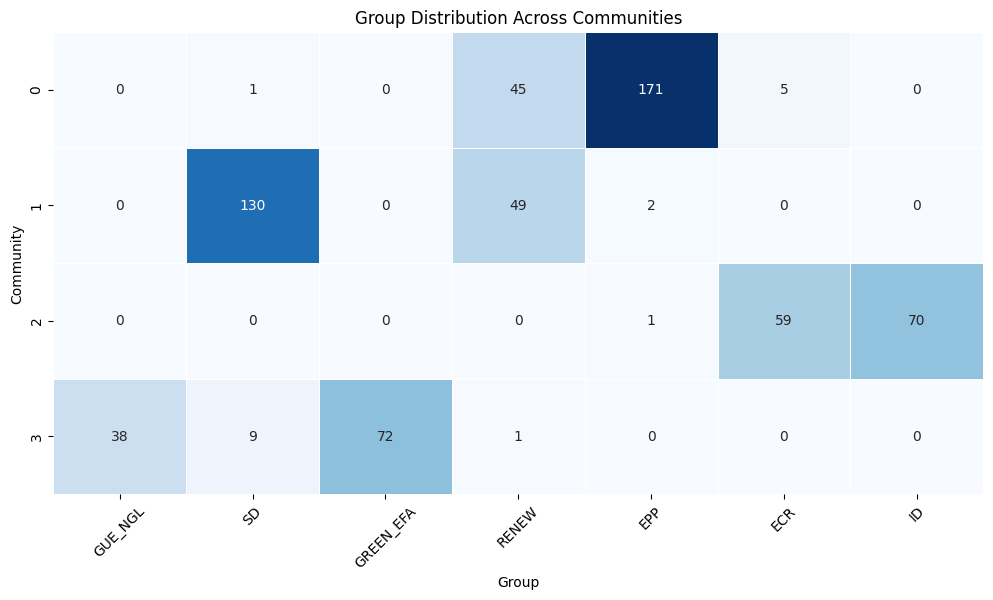

In [44]:
# Visualize the relevant communities obtained for the entire term
community_results_entire_term = analyze_communities(cleaned_edgelist_entire_term)

plot_community_heatmap(community_results_entire_term)

In [45]:
# Export the cleaned edgelist for the entire term as a CSV for Gephi visualization
cleaned_edgelist_entire_term.to_csv("../matrices_and_networks/entire_term/edges.csv", index=False)

In [46]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_entire_term
unique_mep_ids = set(cleaned_edgelist_entire_term['Source']).union(set(cleaned_edgelist_entire_term['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/entire_term/nodes.csv", index=False)

## 3. Primary subjects
<a id="#Primary-subjects"></a>

### 3.1. European citizenship
<a id="European-citizenship"></a>

In [47]:
# Filter for only bills whose primary subject is 1 - European citizenship (among any other possible primary subjects)
primary_subject_bills_1 = primary_subject_bills[primary_subject_bills["primary_subject"] == "European citizenship"]

In [48]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 1 (among any other possible primary subjects)
member_votes_1 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_1['id_bill'])]

In [49]:
# Create the agents and artifacts for all bills whose primary subject is 1 (among any other possible primary subjects)
all_bills_primary_subject_1 = create_agents_and_artifacts(member_votes_1)

all_bills_primary_subject_1

,name,bill_3,bill_94,bill_96,bill_116,bill_133,bill_207,bill_230,bill_241,bill_262,...,bill_1685,bill_1718,bill_1733,bill_1736,bill_1744,bill_1772,bill_1846,bill_1849,bill_1875,bill_1887
0,Charles GOERENS (LUX-RENEW),1,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
1,Constanze KREHL (DEU-SD),1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,0,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1


In [50]:
# Save the agents and artifacts matrix for all bills whose primary subject is 1 (among any other possible primary subjects)
all_bills_primary_subject_1.to_csv("../matrices_and_networks/primary_subjects/1_european_citizenship/agents_and_artifacts_1.csv", index=False)

In [51]:
# Load the edgelist for all bills whose primary subject is 1 (among any other possible primary subjects)
edgelist_1 = pd.read_csv("../matrices_and_networks/primary_subjects/1_european_citizenship/edgelist_1.csv")

# Visualize the edgelist for all bills whose primary subject is 1 (among any other possible primary subjects)
edgelist_1

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
2,Constanze KREHL (DEU-SD),Ismail ERTUG (DEU-SD),1
3,Constanze KREHL (DEU-SD),Michal ŠIMEČKA (SVK-RENEW),1
4,Constanze KREHL (DEU-SD),Eric ANDRIEU (FRA-SD),1
...,...,...,...
3255,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),Camilla LAURETI (ITA-SD),1
3256,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
3257,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
3258,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [52]:
# Create the cleaned edgelist of all bills whose primary subject is 1 (among any other possible primary subjects)
cleaned_edgelist_1 = create_clean_edgelist(edgelist_1)

cleaned_edgelist_1

,Source,Target
0,2,10
1,2,46
2,2,149
3,2,186
4,2,195
...,...,...
3255,811,817
3256,813,816
3257,815,816
3258,815,817


In [53]:
# Compute the optimal modularity for all bills whose primary subject is 1 (among any other possible primary subjects)
optimal_modularity_1 = compute_optimal_modularity(cleaned_edgelist_1)

optimal_modularity_1

0.48301681470887126

In [54]:
# Compute the group modularity for all bills whose primary subject is 1 (among any other possible primary subjects)
group_modularity_1 = compute_group_modularity(cleaned_edgelist_1)

group_modularity_1

0.41215885994956536

In [55]:
# Compute the nationality modularity for all bills whose primary subject is 1 (among any other possible primary subjects)
nationality_modularity_1 = compute_nationality_modularity(cleaned_edgelist_1)

nationality_modularity_1

0.17882367608867478

In [56]:
# Compute the group assortativity for all bills whose primary subject is 1 (among any other possible primary subjects)
group_assortativity_1 = compute_group_assortativity(cleaned_edgelist_1)

group_assortativity_1

0.6250531281520593

In [57]:
# Compute the nationality assortativity for all bills whose primary subject is 1 (among any other possible primary subjects)
nationality_assortativity_1 = compute_nationality_assortativity(cleaned_edgelist_1)

nationality_assortativity_1

0.21129849242733653

In [58]:
# Compute the average clustering coefficient for all bills whose primary subject is 1 (among any other possible primary subjects)
average_clustering_coefficient_1 = compute_average_clustering_coefficient(cleaned_edgelist_1)

average_clustering_coefficient_1

0.48485870832445543

In [59]:
# Compute the network density for all bills whose primary subject is 1 (among any other possible primary subjects)
network_density_1 = compute_network_density(cleaned_edgelist_1)

network_density_1

0.062301723808431755

In [60]:
# Compute the percentage of remaining nodes for all bills whose primary subject is 1 (among any other possible primary subjects)
percentage_remaining_nodes_1 = compute_percentage_of_remaining_nodes(cleaned_edgelist_1)

percentage_remaining_nodes_1

46.618705035971225

In [61]:
# Compute the total detected communities for all bills whose primary subject is 1 (among any other possible primary subjects)
total_communities_1 = compute_total_detected_communities(cleaned_edgelist_1)

total_communities_1

14

The network is **disconnected** with 9 components.
Removed 8 small components (<30 nodes).


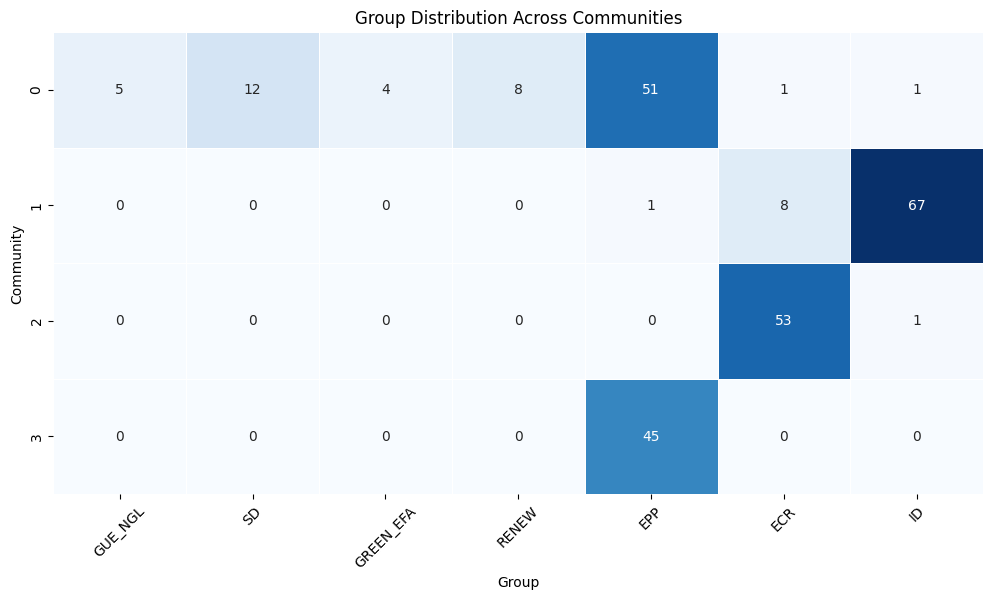

In [62]:
# Visualize the relevant communities obtained for all bills whose primary subject is 1 (among any other possible primary subjects)
community_results_1 = analyze_communities(cleaned_edgelist_1)

plot_community_heatmap(community_results_1)

In [63]:
# Export the edges file as a CSV
cleaned_edgelist_1.to_csv("../matrices_and_networks/primary_subjects/1_european_citizenship/edges.csv", index=False)

In [64]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_1
unique_mep_ids = set(cleaned_edgelist_1['Source']).union(set(cleaned_edgelist_1['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/1_european_citizenship/nodes.csv", index=False)

### 3.2. Internal market, single market
<a id="Internal-market-single-market"></a>

In [65]:
# Filter for only bills whose primary subject is 2 - Internal market, single market (among any other possible primary subjects)
primary_subject_bills_2 = primary_subject_bills[primary_subject_bills["primary_subject"] == "Internal market, single market"]

In [66]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 2 (among any other possible primary subjects)
member_votes_2 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_2['id_bill'])]

In [67]:
# Create the agents and artifacts for all bills whose primary subject is 2 (among any other possible primary subjects)
all_bills_primary_subject_2 = create_agents_and_artifacts(member_votes_2)

all_bills_primary_subject_2

,name,bill_42,bill_50,bill_72,bill_73,bill_81,bill_92,bill_103,bill_114,bill_208,...,bill_1854,bill_1858,bill_1860,bill_1861,bill_1862,bill_1864,bill_1877,bill_1878,bill_1880,bill_1882
0,Charles GOERENS (LUX-RENEW),1,1,1,1,0,1,0,0,1,...,0,1,1,1,1,0,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,0,0,1,0,0
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,0,0
4,Peter LIESE (DEU-EPP),0,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,0,0
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,0


In [68]:
# Save the agents and artifacts for all bills whose primary subject is 2 (among any other possible primary subjects)
all_bills_primary_subject_2.to_csv("../matrices_and_networks/primary_subjects/2_internal_market_single_market/agents_and_artifacts_2.csv", index=False)

In [69]:
# Load the edgelist for all bills whose primary subject is 2 (among any other possible primary subjects)
edgelist_2 = pd.read_csv("../matrices_and_networks/primary_subjects/2_internal_market_single_market/edgelist_2.csv")

# Visualize the edgelist for all bills whose primary subject is 2 (among any other possible primary subjects)
edgelist_2

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
2,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
3,Constanze KREHL (DEU-SD),Yannick JADOT (FRA-GREEN_EFA),1
4,Constanze KREHL (DEU-SD),Michèle RIVASI (FRA-GREEN_EFA),1
...,...,...,...
5265,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
5266,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
5267,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
5268,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [70]:
# Create the cleaned edgelist of all bills whose primary subject is 2 (among any other possible primary subjects)
cleaned_edgelist_2 = create_clean_edgelist(edgelist_2)

cleaned_edgelist_2

,Source,Target
0,2,10
1,2,20
2,2,46
3,2,121
4,2,122
...,...,...
5265,813,816
5266,813,817
5267,815,816
5268,815,817


In [71]:
# Compute the optimal modularity for all bills whose primary subject is 2 (among any other possible primary subjects)
optimal_modularity_2 = compute_optimal_modularity(cleaned_edgelist_2)

optimal_modularity_2

0.7178029301945417

In [72]:
# Compute the group modularity for all bills whose primary subject is 2 (among any other possible primary subjects)
group_modularity_2 = compute_group_modularity(cleaned_edgelist_2)

group_modularity_2

0.6091993093987305

In [73]:
# Compute the nationality modularity for all bills whose primary subject is 2 (among any other possible primary subjects)
nationality_modularity_2 = compute_nationality_modularity(cleaned_edgelist_2)

nationality_modularity_2

0.18776442143240354

In [74]:
# Compute the group assortativity for all bills whose primary subject is 2 (among any other possible primary subjects)
group_assortativity_2 = compute_group_assortativity(cleaned_edgelist_2) 

group_assortativity_2

0.7869826734778491

In [75]:
# Compute the nationality assortativity for all bills whose primary subject is 2 (among any other possible primary subjects)
nationality_assortativity_2 = compute_nationality_assortativity(cleaned_edgelist_2)

nationality_assortativity_2

0.20957632608024887

In [76]:
# Compute the average clustering coefficient for all bills whose primary subject is 2 (among any other possible primary subjects)
average_clustering_coefficient_2 = compute_average_clustering_coefficient(cleaned_edgelist_2)

average_clustering_coefficient_2

0.6587711440323584

In [77]:
# Compute the network density for all bills whose primary subject is 2 (among any other possible primary subjects)
network_density_2 = compute_network_density(cleaned_edgelist_2)

network_density_2

0.06637196005088097

In [78]:
# Compute the percentage of remaining nodes for all bills whose primary subject is 2 (among any other possible primary subjects)
percentage_remaining_nodes_2 = compute_percentage_of_remaining_nodes(cleaned_edgelist_2)

percentage_remaining_nodes_2

57.41007194244604

In [79]:
# Compute the total detected communities for all bills whose primary subject is 2 (among any other possible primary subjects)
total_communities_2 = compute_total_detected_communities(cleaned_edgelist_2)

total_communities_2

39

The network is **disconnected** with 23 components.
Removed 22 small components (<30 nodes).


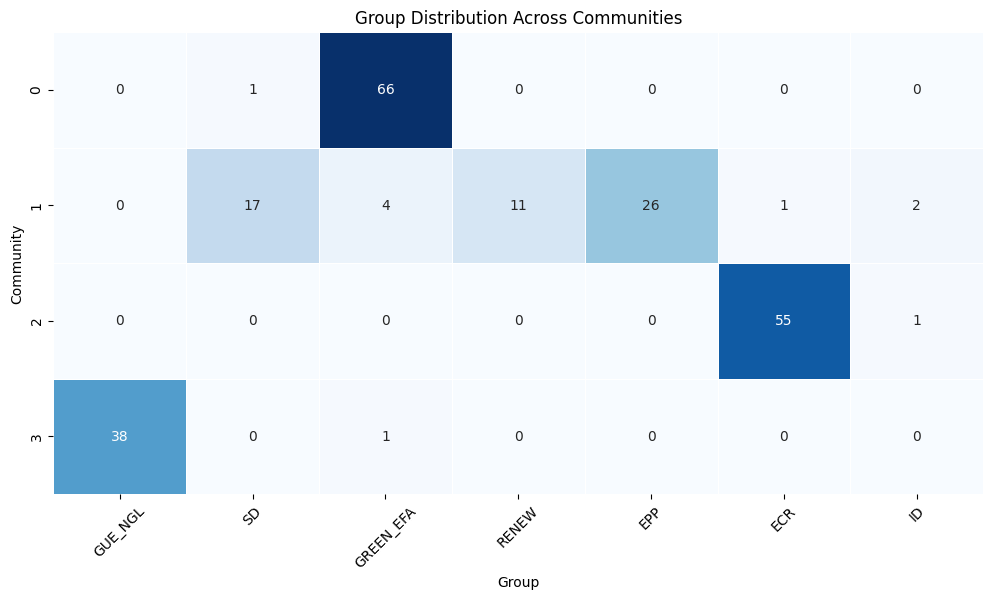

In [80]:
# Visualize the relevant communities obtained for all bills whose primary subject is 2 (among any other possible primary subjects)
community_results_2 = analyze_communities(cleaned_edgelist_2)

plot_community_heatmap(community_results_2)

In [81]:
# Export the edges file as a CSV
cleaned_edgelist_2.to_csv("../matrices_and_networks/primary_subjects/2_internal_market_single_market/edges.csv", index=False)

In [82]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_2
unique_mep_ids = set(cleaned_edgelist_2['Source']).union(set(cleaned_edgelist_2['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/2_internal_market_single_market/nodes.csv", index=False)

### 3.3. Community policies
<a id="Community-policies"></a>

In [83]:
# Filter for only bills whose primary subject is 3 - Community policies (among any other possible primary subjects)
primary_subject_bills_3 = primary_subject_bills[primary_subject_bills["primary_subject"] == "Community policies"]

In [84]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 3 (among any other possible primary subjects)
member_votes_3 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_3['id_bill'])]

In [85]:
# Create the agents and artifacts for all bills whose primary subject is 3 (among any other possible primary subjects)
all_bills_primary_subject_3 = create_agents_and_artifacts(member_votes_3)

all_bills_primary_subject_3

,name,bill_5,bill_17,bill_19,bill_20,bill_21,bill_22,bill_23,bill_26,bill_31,...,bill_1868,bill_1872,bill_1875,bill_1881,bill_1885,bill_1886,bill_1888,bill_1889,bill_1894,bill_1902
0,Charles GOERENS (LUX-RENEW),1,1,1,0,0,0,0,1,1,...,1,1,1,1,1,1,1,0,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,0,0,1,0,1
3,Markus FERBER (DEU-EPP),1,1,0,0,0,0,0,1,1,...,1,1,1,0,1,1,1,0,0,1
4,Peter LIESE (DEU-EPP),1,1,0,0,0,0,0,1,1,...,1,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,0,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,0,0,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,1,1


In [86]:
# Save the agents and artifacts matrix for all bills whose primary subject is 3 (among any other possible primary subjects)
all_bills_primary_subject_3.to_csv("../matrices_and_networks/primary_subjects/3_community_policies/agents_and_artifacts_3.csv", index=False)

In [87]:
# Load the edgelist for all bills whose primary subject is 3 (among any other possible primary subjects)
edgelist_3 = pd.read_csv("../matrices_and_networks/primary_subjects/3_community_policies/edgelist_3.csv")

# Visualize the edgelist for all bills whose primary subject is 3 (among any other possible primary subjects)
edgelist_3

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Peter LIESE (DEU-EPP),1
1,Charles GOERENS (LUX-RENEW),Antonius MANDERS (NLD-EPP),1
2,Charles GOERENS (LUX-RENEW),Fabienne KELLER (FRA-RENEW),1
3,Charles GOERENS (LUX-RENEW),Sophia IN 'T VELD (NLD-RENEW),1
4,Charles GOERENS (LUX-RENEW),Jan OLBRYCHT (POL-EPP),1
...,...,...,...
24812,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
24813,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
24814,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
24815,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [88]:
# Create the cleaned edgelist of all bills whose primary subject is 3 (among any other possible primary subjects)
cleaned_edgelist_3 = create_clean_edgelist(edgelist_3)

cleaned_edgelist_3

,Source,Target
0,0,7
1,0,28
2,0,33
3,0,58
4,0,60
...,...,...
24812,813,816
24813,813,817
24814,815,816
24815,815,817


In [89]:
# Compute the optimal modularity for all bills whose primary subject is 3 (among any other possible primary subjects)
optimal_modularity_3 = compute_optimal_modularity(cleaned_edgelist_3)

optimal_modularity_3

0.5528344899338582

In [90]:
# Compute the group modularity for all bills whose primary subject is 3 (among any other possible primary subjects)
group_modularity_3 = compute_group_modularity(cleaned_edgelist_3)

group_modularity_3

0.41268431779634873

In [91]:
# Compute the nationality modularity for all bills whose primary subject is 3 (among any other possible primary subjects)
nationality_modularity_3 = compute_nationality_modularity(cleaned_edgelist_3)

nationality_modularity_3

0.0671104368573193

In [92]:
# Compute the group assortativity for all bills whose primary subject is 3 (among any other possible primary subjects)
group_assortativity_3 = compute_group_assortativity(cleaned_edgelist_3)

group_assortativity_3

0.5529839239161023

In [93]:
# Compute the nationality assortativity for all bills whose primary subject is 3 (among any other possible primary subjects)
nationality_assortativity_3 = compute_nationality_assortativity(cleaned_edgelist_3)

nationality_assortativity_3

0.07304261532855577

In [94]:
# Compute the average clustering coefficient for all bills whose primary subject is 3 (among any other possible primary subjects)
average_clustering_coefficient_3 = compute_average_clustering_coefficient(cleaned_edgelist_3)

average_clustering_coefficient_3

0.6714510720452049

In [95]:
# Compute the network density for all bills whose primary subject is 3 (among any other possible primary subjects)
network_density_3 = compute_network_density(cleaned_edgelist_3)

network_density_3

0.1165785097567621

In [96]:
# Compute the percentage of remaining nodes for all bills whose primary subject is 3 (among any other possible primary subjects)
percentage_remaining_nodes_3 = compute_percentage_of_remaining_nodes(cleaned_edgelist_3)

percentage_remaining_nodes_3

93.9568345323741

In [97]:
# Compute the total detected communities for all bills whose primary subject is 3 (among any other possible primary subjects)
total_communities_3 = compute_total_detected_communities(cleaned_edgelist_3)

total_communities_3

8

The network is **connected**. Running Louvain community detection on the full graph.


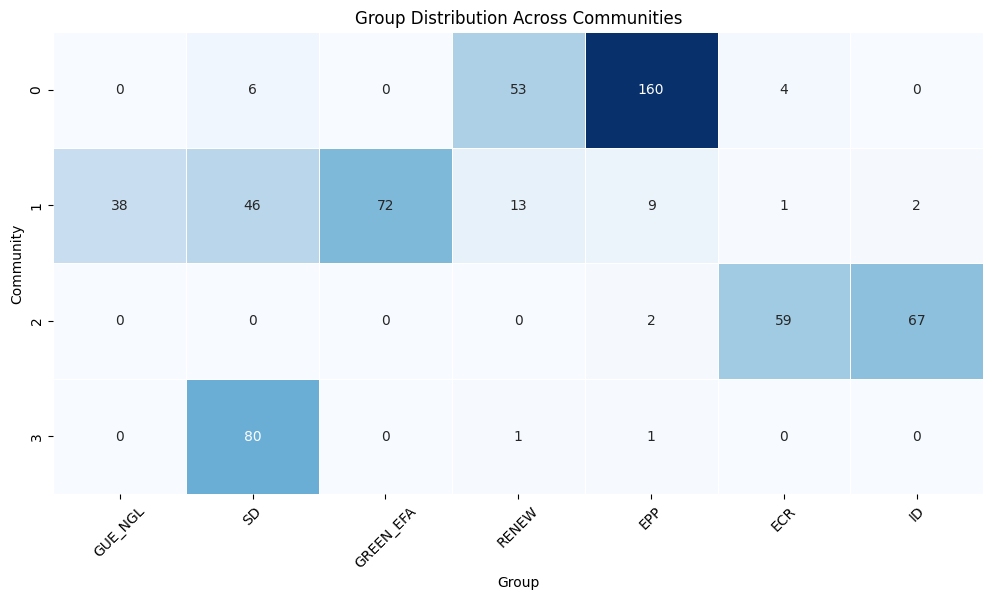

In [98]:
# Visualize the relevant communities obtained for all bills whose primary subject is 3 (among any other possible primary subjects)
community_results_3 = analyze_communities(cleaned_edgelist_3)

plot_community_heatmap(community_results_3)

In [99]:
# Export the edges file as a CSV
cleaned_edgelist_3.to_csv("../matrices_and_networks/primary_subjects/3_community_policies/edges.csv", index=False)

In [100]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_3
unique_mep_ids = set(cleaned_edgelist_3['Source']).union(set(cleaned_edgelist_3['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/3_community_policies/nodes.csv", index=False)

### 3.4. Economic, social and territorial cohesion
<a id="Economic-social-and-territorial-cohesion"></a>

In [101]:
# Filter for only bills whose primary subject is 4 - Economic, social and territorial cohesion (among any other possible primary subjects)
primary_subject_bills_4 = primary_subject_bills[primary_subject_bills["primary_subject"] == "Economic, social and territorial cohesion"]

In [102]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 4 (among any other possible primary subjects)
member_votes_4 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_4['id_bill'])]

In [103]:
# Create the agents and artifacts for all bills whose primary subject is 4 (among any other possible primary subjects)
all_bills_primary_subject_4 = create_agents_and_artifacts(member_votes_4)

all_bills_primary_subject_4

,name,bill_4,bill_11,bill_18,bill_27,bill_37,bill_43,bill_48,bill_51,bill_63,...,bill_1864,bill_1865,bill_1866,bill_1875,bill_1876,bill_1878,bill_1882,bill_1883,bill_1894,bill_1901
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
3,Markus FERBER (DEU-EPP),1,1,0,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,0,1
4,Peter LIESE (DEU-EPP),1,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,0,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,0,1,1,1


In [104]:
# Save the agents and artifacts for all bills whose primary subject is 4 (among any other possible primary subjects)
all_bills_primary_subject_4.to_csv("../matrices_and_networks/primary_subjects/4_economic_social_and_territorial_cohesion/agents_and_artifacts_4.csv", index=False)

In [105]:
# Load the edgelist for all bills whose primary subject is 4 (among any other possible primary subjects)
edgelist_4 = pd.read_csv("../matrices_and_networks/primary_subjects/4_economic_social_and_territorial_cohesion/edgelist_4.csv")

# Visualize the edgelist for all bills whose primary subject is 4 (among any other possible primary subjects)
edgelist_4

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
2,Constanze KREHL (DEU-SD),Lara WOLTERS (NLD-SD),1
3,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
4,Constanze KREHL (DEU-SD),Aldo PATRICIELLO (ITA-EPP),1
...,...,...,...
11211,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
11212,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
11213,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
11214,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [106]:
# Create the cleaned edgelist of all bills whose primary subject is 4 (among any other possible primary subjects)
cleaned_edgelist_4 = create_clean_edgelist(edgelist_4)

cleaned_edgelist_4

,Source,Target
0,2,10
1,2,20
2,2,30
3,2,46
4,2,86
...,...,...
11211,813,816
11212,813,817
11213,815,816
11214,815,817


In [107]:
# Compute the optimal modularity for all bills whose primary subject is 4 (among any other possible primary subjects)
optimal_modularity_4 = compute_optimal_modularity(cleaned_edgelist_4)

optimal_modularity_4

0.6621902582170671

In [108]:
# Compute the group modularity for all bills whose primary subject is 4 (among any other possible primary subjects)
group_modularity_4 = compute_group_modularity(cleaned_edgelist_4)

group_modularity_4

0.5492330061141512

In [109]:
# Compute the nationality modularity for all bills whose primary subject is 4 (among any other possible primary subjects)
nationality_modularity_4 = compute_nationality_modularity(cleaned_edgelist_4)

nationality_modularity_4

0.12350569945675731

In [110]:
# Compute the group assortativity for all bills whose primary subject is 4 (among any other possible primary subjects)
group_assortativity_4 = compute_group_assortativity(cleaned_edgelist_4)

group_assortativity_4

0.7395907556601362

In [111]:
# Compute the nationality assortativity for all bills whose primary subject is 4 (among any other possible primary subjects)
nationality_assortativity_4 = compute_nationality_assortativity(cleaned_edgelist_4)

nationality_assortativity_4

0.13655433382234206

In [112]:
# Compute the average clustering coefficient for all bills whose primary subject is 4 (among any other possible primary subjects)
average_clustering_coefficient_4 = compute_average_clustering_coefficient(cleaned_edgelist_4)

average_clustering_coefficient_4

0.6067382588726594

In [113]:
# Compute the network density for all bills whose primary subject is 4 (among any other possible primary subjects)
network_density_4 = compute_network_density(cleaned_edgelist_4)

network_density_4

0.05959902439542805

In [114]:
# Compute the percentage of remaining nodes for all bills whose primary subject is 4 (among any other possible primary subjects)
percentage_remaining_nodes_4 = compute_percentage_of_remaining_nodes(cleaned_edgelist_4)

percentage_remaining_nodes_4

88.34532374100719

In [115]:
# Compute the total detected communities for all bills whose primary subject is 4 (among any other possible primary subjects)
total_communities_4 = compute_total_detected_communities(cleaned_edgelist_4)

total_communities_4

25

The network is **disconnected** with 3 components.
Removed 2 small components (<30 nodes).


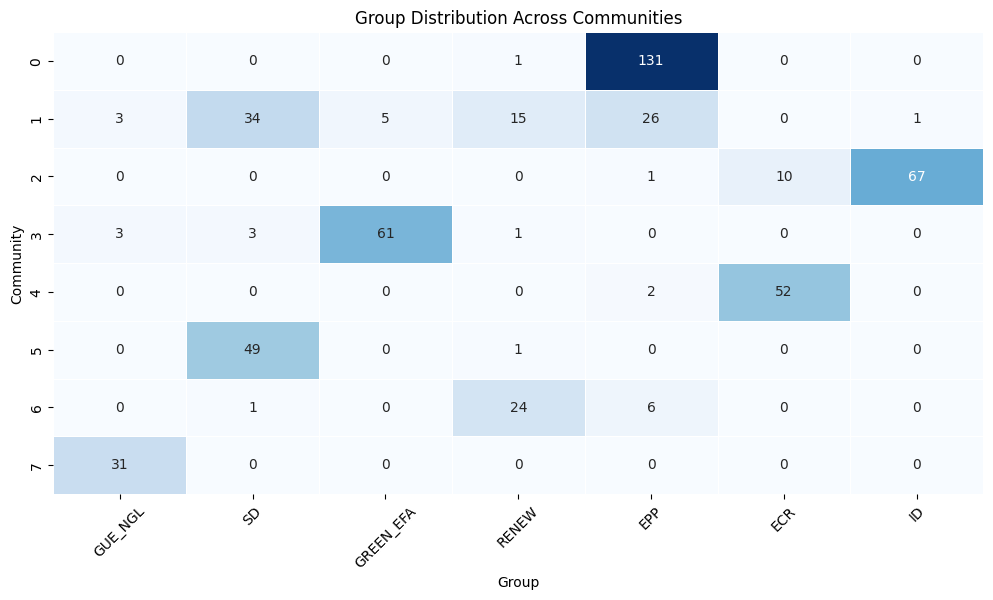

In [116]:
# Visualize the relevant communities obtained for all bills whose primary subject is 4 (among any other possible primary subjects)
community_results_4 = analyze_communities(cleaned_edgelist_4)

plot_community_heatmap(community_results_4)

In [117]:
# Export the edges file as a CSV
cleaned_edgelist_4.to_csv("../matrices_and_networks/primary_subjects/4_economic_social_and_territorial_cohesion/edges.csv", index=False)

In [118]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_4
unique_mep_ids = set(cleaned_edgelist_4['Source']).union(set(cleaned_edgelist_4['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/4_economic_social_and_territorial_cohesion/nodes.csv", index=False)

### 3.5. Economic and monetary system
<a id="Economic-and-monetary-system"></a>

In [119]:
# Filter for only bills whose primary subject is 5 - Economic and monetary system (among any other possible primary subjects)
primary_subject_bills_5 = primary_subject_bills[primary_subject_bills["primary_subject"] == "Economic and monetary system"]

In [120]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 5 (among any other possible primary subjects)
member_votes_5 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_5['id_bill'])]

In [121]:
# Create the agents and artifacts for all bills whose primary subject is 5 (among any other possible primary subjects)
all_bills_primary_subject_5 = create_agents_and_artifacts(member_votes_5)

all_bills_primary_subject_5

,name,bill_18,bill_27,bill_111,bill_305,bill_306,bill_419,bill_436,bill_447,bill_469,...,bill_1371,bill_1623,bill_1651,bill_1675,bill_1706,bill_1722,bill_1852,bill_1869,bill_1870,bill_1871
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,0,1,1,...,1,0,1,1,1,1,1,0,1,0
3,Markus FERBER (DEU-EPP),0,1,1,0,1,1,0,1,1,...,1,0,1,1,1,0,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,1,1,1,1


In [122]:
# Save the agents and artifacts for all bills whose primary subject is 5 (among any other possible primary subjects)
all_bills_primary_subject_5.to_csv("../matrices_and_networks/primary_subjects/5_economic_and_monetary_system/agents_and_artifacts_5.csv", index=False)

In [123]:
# Load the edgelist for all bills whose primary subject is 5 (among any other possible primary subjects)
edgelist_5 = pd.read_csv("../matrices_and_networks/primary_subjects/5_economic_and_monetary_system/edgelist_5.csv")

# Visualize the edgelist for all bills whose primary subject is 5 (among any other possible primary subjects)
edgelist_5

,from,to,weight
0,Constanze KREHL (DEU-SD),Manuel PIZARRO (PRT-SD),1
1,Adam BIELAN (POL-ECR),Jadwiga WIŚNIEWSKA (POL-ECR),1
2,Adam BIELAN (POL-ECR),Geert BOURGEOIS (BEL-ECR),1
3,Adam BIELAN (POL-ECR),Beata KEMPA (POL-ECR),1
4,Adam BIELAN (POL-ECR),Dominik TARCZYŃSKI (POL-ECR),1
...,...,...,...
212,Anna BONFRISCO (ITA-ID),Valentino GRANT (ITA-ID),1
213,Jorge BUXADÉ VILLALBA (ESP-ECR),Mazaly AGUILAR (ESP-ECR),1
214,Jorge BUXADÉ VILLALBA (ESP-ECR),Margarita DE LA PISA CARRIÓN (ESP-ECR),1
215,Hermann TERTSCH (ESP-ECR),Margarita DE LA PISA CARRIÓN (ESP-ECR),1


In [124]:
# Create the cleaned edgelist of all bills whose primary subject is 5 (among any other possible primary subjects)
cleaned_edgelist_5 = create_clean_edgelist(edgelist_5)

cleaned_edgelist_5

,Source,Target
0,2,657
1,38,270
2,38,436
3,38,479
4,38,785
...,...,...
212,704,714
213,742,767
214,742,790
215,743,790


In [125]:
# Compute the optimal modularity for all bills whose primary subject is 5 (among any other possible primary subjects)
optimal_modularity_5 = compute_optimal_modularity(cleaned_edgelist_5)

optimal_modularity_5

0.8034148102529256

In [126]:
# Compute the group modularity for all bills whose primary subject is 5 (among any other possible primary subjects)
group_modularity_5 = compute_group_modularity(cleaned_edgelist_5)

group_modularity_5

0.483690458493491

In [127]:
# Compute the nationality modularity for all bills whose primary subject is 5 (among any other possible primary subjects)
nationality_modularity_5 = compute_nationality_modularity(cleaned_edgelist_5)

nationality_modularity_5

0.5488542971819321

In [128]:
# Compute the group assortativity for all bills whose primary subject is 5 (among any other possible primary subjects)
group_assortativity_5 = compute_group_assortativity(cleaned_edgelist_5)

group_assortativity_5

0.9905625502859504

In [129]:
# Compute the nationality assortativity for all bills whose primary subject is 5 (among any other possible primary subjects)
nationality_assortativity_5 = compute_nationality_assortativity(cleaned_edgelist_5)

nationality_assortativity_5

0.7170402840972145

In [130]:
# Compute the average clustering coefficient for all bills whose primary subject is 5 (among any other possible primary subjects)
average_clustering_coefficient_5 = compute_average_clustering_coefficient(cleaned_edgelist_5)

average_clustering_coefficient_5

0.7149778516057587

In [131]:
# Compute the network density for all bills whose primary subject is 5 (among any other possible primary subjects)
network_density_5 = compute_network_density(cleaned_edgelist_5)

network_density_5

0.059370725034199726

In [132]:
# Compute the percentage of remaining nodes for all bills whose primary subject is 5 (among any other possible primary subjects)
percentage_remaining_nodes_5 = compute_percentage_of_remaining_nodes(cleaned_edgelist_5)

percentage_remaining_nodes_5

12.37410071942446

In [133]:
# Compute the total detected communities for all bills whose primary subject is 5 (among any other possible primary subjects)
total_communities_5 = compute_total_detected_communities(cleaned_edgelist_5)

total_communities_5

20

In [134]:
# Visualize the relevant communities obtained for all bills whose primary subject is 5 (among any other possible primary subjects)
try:
    community_results_5 = analyze_communities(cleaned_edgelist_5)
    plot_community_heatmap(community_results_5)
    
except Exception:
    print("No relevant communities were found for this subject.")

The network is **disconnected** with 20 components.
Removed 20 small components (<30 nodes).
No relevant communities were found for this subject.


<Figure size 1200x600 with 0 Axes>

### 3.6. External relations of the Union
<a id="External-relations-of-the-Union"></a>

In [135]:
# Filter for only bills whose primary subject is 6 - External relations of the Union (among any other possible primary subjects)
primary_subject_bills_6 = primary_subject_bills[primary_subject_bills["primary_subject"] == "External relations of the Union"]

In [136]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 6 (among any other possible primary subjects)
member_votes_6 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_6['id_bill'])]

In [137]:
# Create the agents and artifacts for all bills whose primary subject is 6 (among any other possible primary subjects)
all_bills_primary_subject_6 = create_agents_and_artifacts(member_votes_6)

all_bills_primary_subject_6

,name,bill_0,bill_2,bill_11,bill_12,bill_13,bill_35,bill_38,bill_39,bill_40,...,bill_1851,bill_1855,bill_1875,bill_1879,bill_1894,bill_1897,bill_1898,bill_1899,bill_1900,bill_1901
0,Charles GOERENS (LUX-RENEW),1,1,1,0,1,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,0,1,0,1,0,1,0,0,...,0,1,1,1,0,1,1,1,1,1
3,Markus FERBER (DEU-EPP),1,1,1,0,1,0,1,0,0,...,1,1,1,1,0,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,0,1,0,1,0,0,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [138]:
# Save the agents and artifacts for all bills whose primary subject is 6 (among any other possible primary subjects)
all_bills_primary_subject_6.to_csv("../matrices_and_networks/primary_subjects/6_external_relations_of_the_union/agents_and_artifacts_6.csv", index=False)

In [139]:
# Load the edgelist for all bills whose primary subject is 6 (among any other possible primary subjects)
edgelist_6 = pd.read_csv("../matrices_and_networks/primary_subjects/6_external_relations_of_the_union/edgelist_6.csv")

# Visualize the edgelist for all bills whose primary subject is 6 (among any other possible primary subjects)
edgelist_6

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Sophia IN 'T VELD (NLD-RENEW),1
1,Charles GOERENS (LUX-RENEW),Nils TORVALDS (FIN-RENEW),1
2,Charles GOERENS (LUX-RENEW),Petras AUŠTREVIČIUS (LTU-RENEW),1
3,Charles GOERENS (LUX-RENEW),Nicola DANTI (ITA-RENEW),1
4,Charles GOERENS (LUX-RENEW),Marie-Pierre VEDRENNE (FRA-RENEW),1
...,...,...,...
13436,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
13437,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
13438,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
13439,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [140]:
# Create the cleaned edgelist of all bills whose primary subject is 6 (among any other possible primary subjects)
cleaned_edgelist_6 = create_clean_edgelist(edgelist_6)

cleaned_edgelist_6

,Source,Target
0,0,58
1,0,197
2,0,230
3,0,248
4,0,463
...,...,...
13436,813,816
13437,813,817
13438,815,816
13439,815,817


In [141]:
# Compute the optimal modularity for all bills whose primary subject is 6 (among any other possible primary subjects)
optimal_modularity_6 = compute_optimal_modularity(cleaned_edgelist_6)

optimal_modularity_6

0.7149613810670635

In [142]:
# Compute the group modularity for all bills whose primary subject is 6 (among any other possible primary subjects)
group_modularity_6 = compute_group_modularity(cleaned_edgelist_6)

group_modularity_6

0.6054914162439321

In [143]:
# Compute the nationality modularity for all bills whose primary subject is 6 (among any other possible primary subjects)
nationality_modularity_6 = compute_nationality_modularity(cleaned_edgelist_6)

nationality_modularity_6

0.1269404817980087

In [144]:
# Compute the group assortativity for all bills whose primary subject is 6 (among any other possible primary subjects)
group_assortativity_6 = compute_group_assortativity(cleaned_edgelist_6)

group_assortativity_6

0.7358810310142149

In [145]:
# Compute the nationality assortativity for all bills whose primary subject is 6 (among any other possible primary subjects)
nationality_assortativity_6 = compute_nationality_assortativity(cleaned_edgelist_6)

nationality_assortativity_6

0.13847726230494964

In [146]:
# Compute the average clustering coefficient for all bills whose primary subject is 6 (among any other possible primary subjects)
average_clustering_coefficient_6 = compute_average_clustering_coefficient(cleaned_edgelist_6)

average_clustering_coefficient_6

0.6199692600743333

In [147]:
# Compute the network density for all bills whose primary subject is 6 (among any other possible primary subjects)
network_density_6 = compute_network_density(cleaned_edgelist_6)

network_density_6

0.06313945076522703

In [148]:
# Compute the percentage of remaining nodes for all bills whose primary subject is 6 (among any other possible primary subjects)
percentage_remaining_nodes_6 = compute_percentage_of_remaining_nodes(cleaned_edgelist_6)

percentage_remaining_nodes_6

93.9568345323741

In [149]:
# Compute the total detected communities for all bills whose primary subject is 6 (among any other possible primary subjects)
total_communities_6 = compute_total_detected_communities(cleaned_edgelist_6)

total_communities_6

11

The network is **disconnected** with 2 components.
Removed 1 small components (<30 nodes).


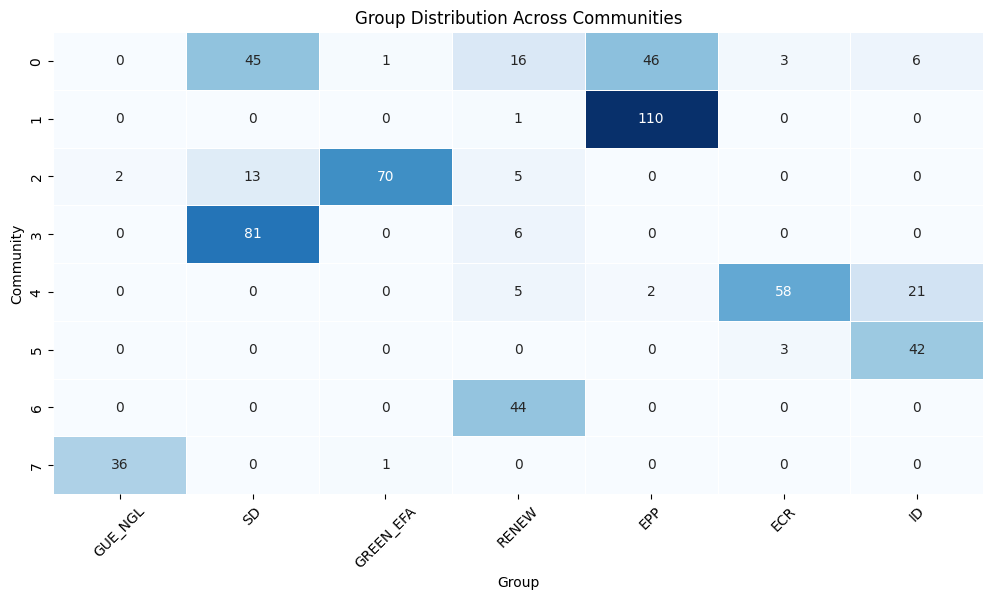

In [150]:
# Visualize the relevant communities obtained for all bills whose primary subject is 6 (among any other possible primary subjects)
community_results_6 = analyze_communities(cleaned_edgelist_6)

plot_community_heatmap(community_results_6)

In [151]:
# Export the edges file as a CSV
cleaned_edgelist_6.to_csv("../matrices_and_networks/primary_subjects/6_external_relations_of_the_union/edges.csv", index=False)

In [152]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_6
unique_mep_ids = set(cleaned_edgelist_6['Source']).union(set(cleaned_edgelist_6['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/6_external_relations_of_the_union/nodes.csv", index=False)

### 3.7. Area of freedom, security and justice
<a id="Area-of-freedom-security-and-justice"></a>

In [153]:
# Filter for only bills whose primary subject is 7 - Area of freedom, security and justice (among any other possible primary subjects)
primary_subject_bills_7 = primary_subject_bills[primary_subject_bills["primary_subject"] == "Area of freedom, security and justice"]

In [154]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 7 (among any other possible primary subjects)
member_votes_7 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_7['id_bill'])]

In [155]:
# Create the agents and artifacts for all bills whose primary subject is 7 (among any other possible primary subjects)
all_bills_primary_subject_7 = create_agents_and_artifacts(member_votes_7)

all_bills_primary_subject_7

,name,bill_1,bill_3,bill_10,bill_14,bill_16,bill_36,bill_53,bill_63,bill_68,...,bill_1850,bill_1853,bill_1855,bill_1858,bill_1870,bill_1873,bill_1874,bill_1883,bill_1884,bill_1890
0,Charles GOERENS (LUX-RENEW),1,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),0,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
3,Markus FERBER (DEU-EPP),1,1,1,1,0,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,0,0,1,0,1,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1


In [156]:
# Save the agents and artifacts for all bills whose primary subject is 7 (among any other possible primary subjects)
all_bills_primary_subject_7.to_csv("../matrices_and_networks/primary_subjects/7_area_of_freedom_security_and_justice/agents_and_artifacts_7.csv", index=False)

In [157]:
# Load the edgelist for all bills whose primary subject is 7 (among any other possible primary subjects)
edgelist_7 = pd.read_csv("../matrices_and_networks/primary_subjects/7_area_of_freedom_security_and_justice/edgelist_7.csv")

# Visualize the edgelist for all bills whose primary subject is 7 (among any other possible primary subjects)
edgelist_7

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
2,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
3,Constanze KREHL (DEU-SD),Ismail ERTUG (DEU-SD),1
4,Constanze KREHL (DEU-SD),Mara BIZZOTTO (ITA-ID),1
...,...,...,...
8420,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
8421,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
8422,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
8423,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [158]:
# Create the cleaned edgelist of all bills whose primary subject is 7 (among any other possible primary subjects)
cleaned_edgelist_7 = create_clean_edgelist(edgelist_7)

cleaned_edgelist_7

,Source,Target
0,2,10
1,2,20
2,2,46
3,2,149
4,2,175
...,...,...
8420,813,816
8421,813,817
8422,815,816
8423,815,817


In [159]:
# Compute the optimal modularity for all bills whose primary subject is 7 (among any other possible primary subjects)
optimal_modularity_7 = compute_optimal_modularity(cleaned_edgelist_7)

optimal_modularity_7

0.606554767586225

In [160]:
# Compute the group modularity for all bills whose primary subject is 7 (among any other possible primary subjects)
group_modularity_7 = compute_group_modularity(cleaned_edgelist_7)

group_modularity_7

0.522429127666881

In [161]:
# Compute the nationality modularity for all bills whose primary subject is 7 (among any other possible primary subjects)
nationality_modularity_7 = compute_nationality_modularity(cleaned_edgelist_7)

nationality_modularity_7

0.10777290986096556

In [162]:
# Compute the group assortativity for all bills whose primary subject is 7 (among any other possible primary subjects)
group_assortativity_7 = compute_group_assortativity(cleaned_edgelist_7)

group_assortativity_7

0.6631244209875543

In [163]:
# Compute the nationality assortativity for all bills whose primary subject is 7 (among any other possible primary subjects)
nationality_assortativity_7 = compute_nationality_assortativity(cleaned_edgelist_7)

nationality_assortativity_7

0.12096834086392623

In [164]:
# Compute the average clustering coefficient for all bills whose primary subject is 7 (among any other possible primary subjects)
average_clustering_coefficient_7 = compute_average_clustering_coefficient(cleaned_edgelist_7)

average_clustering_coefficient_7

0.5766688785468566

In [165]:
# Compute the network density for all bills whose primary subject is 7 (among any other possible primary subjects)
network_density_7 = compute_network_density(cleaned_edgelist_7)

network_density_7

0.06516560184397382

In [166]:
# Compute the percentage of remaining nodes for all bills whose primary subject is 7 (among any other possible primary subjects)
percentage_remaining_nodes_7 = compute_percentage_of_remaining_nodes(cleaned_edgelist_7)

percentage_remaining_nodes_7

73.23741007194245

In [167]:
# Compute the total detected communities for all bills whose primary subject is 7 (among any other possible primary subjects)
total_communities_7 = compute_total_detected_communities(cleaned_edgelist_7)

total_communities_7

49

The network is **disconnected** with 21 components.
Removed 20 small components (<30 nodes).


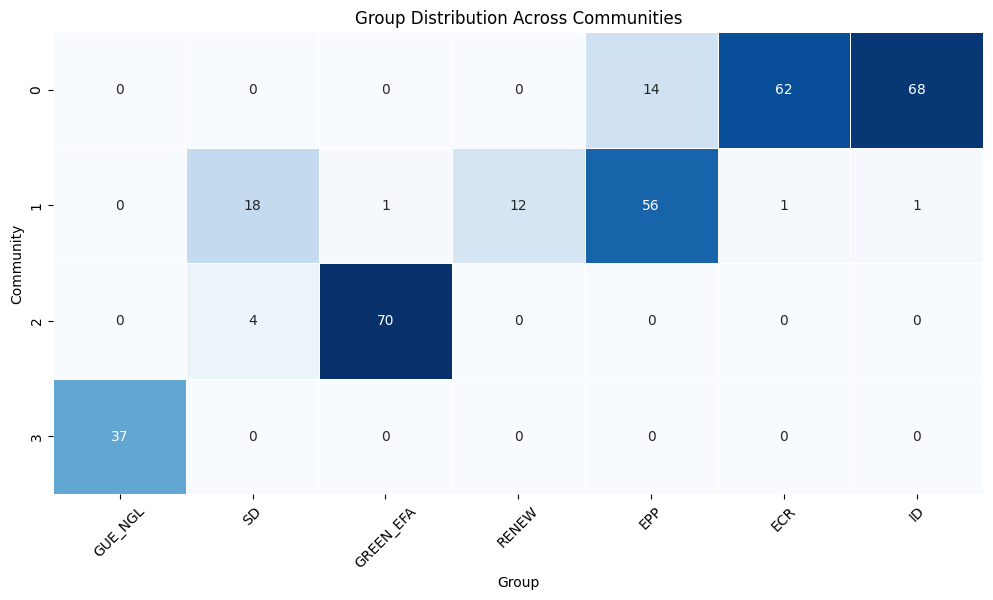

In [168]:
# Visualize the relevant communities obtained for all bills whose primary subject is 7 (among any other possible primary subjects)
community_results_7 = analyze_communities(cleaned_edgelist_7)

plot_community_heatmap(community_results_7)

In [169]:
# Export the edges file as a CSV
cleaned_edgelist_7.to_csv("../matrices_and_networks/primary_subjects/7_area_of_freedom_security_and_justice/edges.csv", index=False)

In [170]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_7
unique_mep_ids = set(cleaned_edgelist_7['Source']).union(set(cleaned_edgelist_7['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/7_area_of_freedom_security_and_justice/nodes.csv", index=False)

### 3.8. State and evolution of the Union
<a id="State-and-evolution-of-the-Union"></a>

In [171]:
# Filter for only bills whose primary subject is 8 - State and evolution of the Union (among any other possible primary subjects)
primary_subject_bills_8 = primary_subject_bills[primary_subject_bills["primary_subject"] == "State and evolution of the Union"]

In [172]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose primary subject is 8 (among any other possible primary subjects)
member_votes_8 = member_votes[member_votes['id_bill'].isin(primary_subject_bills_8['id_bill'])]

In [173]:
# Create the agents and artifacts for all bills whose primary subject is 8 (among any other possible primary subjects)
all_bills_primary_subject_8 = create_agents_and_artifacts(member_votes_8)

all_bills_primary_subject_8

,name,bill_4,bill_5,bill_6,bill_7,bill_8,bill_9,bill_15,bill_16,bill_17,...,bill_1856,bill_1863,bill_1865,bill_1866,bill_1891,bill_1892,bill_1893,bill_1895,bill_1896,bill_1902
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,0,1,...,1,0,0,0,1,0,1,1,1,1
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [174]:
# Save the agents and artifacts for all bills whose primary subject is 8 (among any other possible primary subjects)
all_bills_primary_subject_8.to_csv("../matrices_and_networks/primary_subjects/8_state_and_evolution_of_the_union/agents_and_artifacts_8.csv", index=False)

In [175]:
# Load the edgelist for all bills whose primary subject is 8 (among any other possible primary subjects)
edgelist_8 = pd.read_csv("../matrices_and_networks/primary_subjects/8_state_and_evolution_of_the_union/edgelist_8.csv")

# Visualize the edgelist for all bills whose primary subject is 8 (among any other possible primary subjects)
edgelist_8

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Frédérique RIES (BEL-RENEW),1
2,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
3,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
4,Constanze KREHL (DEU-SD),Markus PIEPER (DEU-EPP),1
...,...,...,...
10578,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
10579,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
10580,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
10581,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [176]:
# Create the cleaned edgelist of all bills whose primary subject is 8 (among any other possible primary subjects)
cleaned_edgelist_8 = create_clean_edgelist(edgelist_8)

cleaned_edgelist_8

,Source,Target
0,2,10
1,2,15
2,2,20
3,2,46
4,2,55
...,...,...
10578,813,816
10579,813,817
10580,815,816
10581,815,817


In [177]:
# Compute the optimal modularity for all bills whose primary subject is 8 (among any other possible primary subjects)
optimal_modularity_8 = compute_optimal_modularity(cleaned_edgelist_8)

optimal_modularity_8

0.5862066747226866

In [178]:
# Compute the group modularity for all bills whose primary subject is 8 (among any other possible primary subjects)
group_modularity_8 = compute_group_modularity(cleaned_edgelist_8)

group_modularity_8

0.3498104270442625

In [179]:
# Compute the nationality modularity for all bills whose primary subject is 8 (among any other possible primary subjects)
nationality_modularity_8 = compute_nationality_modularity(cleaned_edgelist_8)

nationality_modularity_8

0.08024322684819804

In [180]:
# Compute the group assortativity for all bills whose primary subject is 8 (among any other possible primary subjects)
group_assortativity_8 = compute_group_assortativity(cleaned_edgelist_8)

group_assortativity_8

0.42323370677771904

In [181]:
# Compute the nationality assortativity for all bills whose primary subject is 8 (among any other possible primary subjects)
nationality_assortativity_8 = compute_nationality_assortativity(cleaned_edgelist_8)

nationality_assortativity_8

0.08748277967642556

In [182]:
# Compute the average clustering coefficient for all bills whose primary subject is 8 (among any other possible primary subjects)
average_clustering_coefficient_8 = compute_average_clustering_coefficient(cleaned_edgelist_8)

average_clustering_coefficient_8

0.6211599729910462

In [183]:
# Compute the network density for all bills whose primary subject is 8 (among any other possible primary subjects)
network_density_8 = compute_network_density(cleaned_edgelist_8)

network_density_8

0.07299073735611177

In [184]:
# Compute the percentage of remaining nodes for all bills whose primary subject is 8 (among any other possible primary subjects)
percentage_remaining_nodes_8 = compute_percentage_of_remaining_nodes(cleaned_edgelist_8)

percentage_remaining_nodes_8

77.55395683453237

In [185]:
# Compute the total detected communities for all bills whose primary subject is 8 (among any other possible primary subjects)
total_communities_8 = compute_total_detected_communities(cleaned_edgelist_8)

total_communities_8

40

The network is **disconnected** with 9 components.
Removed 8 small components (<30 nodes).


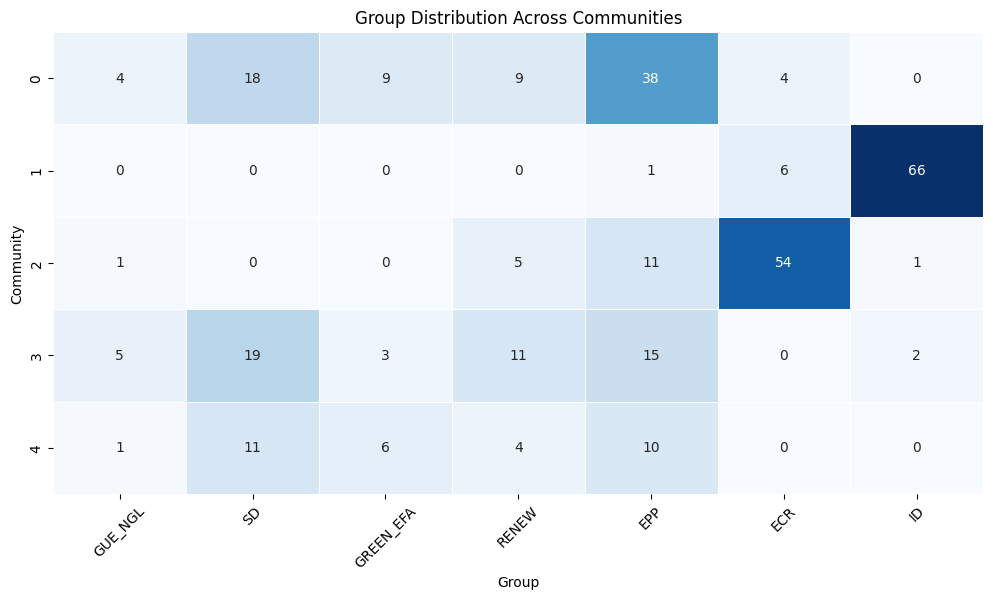

In [186]:
# Visualize the relevant communities obtained for all bills whose primary subject is 8 (among any other possible primary subjects)
community_results_8 = analyze_communities(cleaned_edgelist_8)

plot_community_heatmap(community_results_8)

In [187]:
# Export the edges file as a CSV
cleaned_edgelist_8.to_csv("../matrices_and_networks/primary_subjects/8_state_and_evolution_of_the_union/edges.csv", index=False)

In [188]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_8
unique_mep_ids = set(cleaned_edgelist_8['Source']).union(set(cleaned_edgelist_8['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/primary_subjects/8_state_and_evolution_of_the_union/nodes.csv", index=False)

In [189]:
# Define the list of optimal modularities across all primary subjects
list_optimal_modularities = [optimal_modularity_1, optimal_modularity_2, optimal_modularity_3, optimal_modularity_4, 
                             optimal_modularity_5, optimal_modularity_6, optimal_modularity_7, optimal_modularity_8]

# Define the list of group modularities across all primary subjects
list_group_modularities = [group_modularity_1, group_modularity_2, group_modularity_3, group_modularity_4, 
                              group_modularity_5, group_modularity_6, group_modularity_7, group_modularity_8]

# Define the list of nationality modularities across all primary subjects
list_nationality_modularities = [nationality_modularity_1, nationality_modularity_2, nationality_modularity_3, nationality_modularity_4,
                              nationality_modularity_5, nationality_modularity_6, nationality_modularity_7, nationality_modularity_8]

# Define the list of group assortativity coefficients across all primary subjects
list_group_assortativity = [group_assortativity_1, group_assortativity_2, group_assortativity_3, group_assortativity_4, 
                            group_assortativity_5, group_assortativity_6, group_assortativity_7, group_assortativity_8]

# Define the list of nationality assortativity coefficients across all primary subjects
list_nationality_assortativity = [nationality_assortativity_1, nationality_assortativity_2, nationality_assortativity_3, nationality_assortativity_4,
                                  nationality_assortativity_5, nationality_assortativity_6, nationality_assortativity_7, nationality_assortativity_8]

# Define the list of average clustering coefficients across all primary subjects
list_average_clustering_coefficients = [average_clustering_coefficient_1, average_clustering_coefficient_2, 
                                        average_clustering_coefficient_3, average_clustering_coefficient_4, 
                                        average_clustering_coefficient_5, average_clustering_coefficient_6, 
                                        average_clustering_coefficient_7, average_clustering_coefficient_8]

# Define the list of network densities across all primary subjects
list_network_density = [network_density_1, network_density_2, network_density_3, network_density_4, 
                        network_density_5, network_density_6, network_density_7, network_density_8]

# Define the list of all percentages of remaining nodes across all primary subjects
list_percentage_remaining_nodes = [percentage_remaining_nodes_1, percentage_remaining_nodes_2, percentage_remaining_nodes_3, percentage_remaining_nodes_4,
                                   percentage_remaining_nodes_5, percentage_remaining_nodes_6, percentage_remaining_nodes_7, percentage_remaining_nodes_8]

# Define the list of total number of detected communities across all primary subjects
list_of_number_of_detected_communities = [total_communities_1, total_communities_2, total_communities_3, total_communities_4, 
                                 total_communities_5, total_communities_6, total_communities_7, total_communities_8]

# Manually define the list of total relevant communities across all primary subjects
list_of_number_of_relevant_communities = [4, 4, 4, 8, 0, 8, 4, 5]


# Define the list of primary subjects
primary_subjects = ["European citizenship", "Internal market, single market", "Community policies", 
                    "Economic, social and territorial cohesion", "Economic and monetary system",
                    "External relations of the Union", "Area of freedom, security and justice", 
                    "State and evolution of the Union"]

# Define the number of bills per primary subject
number_of_bills = [98, 191, 595, 386, 31, 444, 176, 567]

# Create a dictionary to store the data
data = {
    "Optimal modularity": list_optimal_modularities,
    "Group modularity": list_group_modularities,
    "Nationality modularity": list_nationality_modularities,
    "Group assortativity": list_group_assortativity,
    "Nationality assortativity": list_nationality_assortativity,
    "Average clustering coefficient": list_average_clustering_coefficients,
    "Network density": list_network_density, 
    "% of remaining nodes": list_percentage_remaining_nodes,
    "Total detected communities": list_of_number_of_detected_communities,
    "Total relevant communities": list_of_number_of_relevant_communities,
    "Number of Bills": number_of_bills,

}

# Create the dataframe with primary subjects as index
df_network_features = pd.DataFrame(data, index=primary_subjects)

df_network_features

,Optimal modularity,Group modularity,Nationality modularity,Group assortativity,Nationality assortativity,Average clustering coefficient,Network density,% of remaining nodes,Total detected communities,Total relevant communities,Number of Bills
European citizenship,0.483017,0.412159,0.178824,0.625053,0.211298,0.484859,0.062302,46.618705,14,4,98
"Internal market, single market",0.717803,0.609199,0.187764,0.786983,0.209576,0.658771,0.066372,57.410072,39,4,191
Community policies,0.552834,0.412684,0.067110,0.552984,0.073043,0.671451,0.116579,93.956835,8,4,595
"Economic, social and territorial cohesion",0.662190,0.549233,0.123506,0.739591,0.136554,0.606738,0.059599,88.345324,25,8,386
Economic and monetary system,0.803415,0.483690,0.548854,0.990563,0.717040,0.714978,0.059371,12.374101,20,0,31
External relations of the Union,0.714961,0.605491,0.126940,0.735881,0.138477,0.619969,0.063139,93.956835,11,8,444
"Area of freedom, security and justice",0.606555,0.522429,0.107773,0.663124,0.120968,0.576669,0.065166,73.237410,49,4,176
State and evolution of the Union,0.586207,0.349810,0.080243,0.423234,0.087483,0.621160,0.072991,77.553957,40,5,567


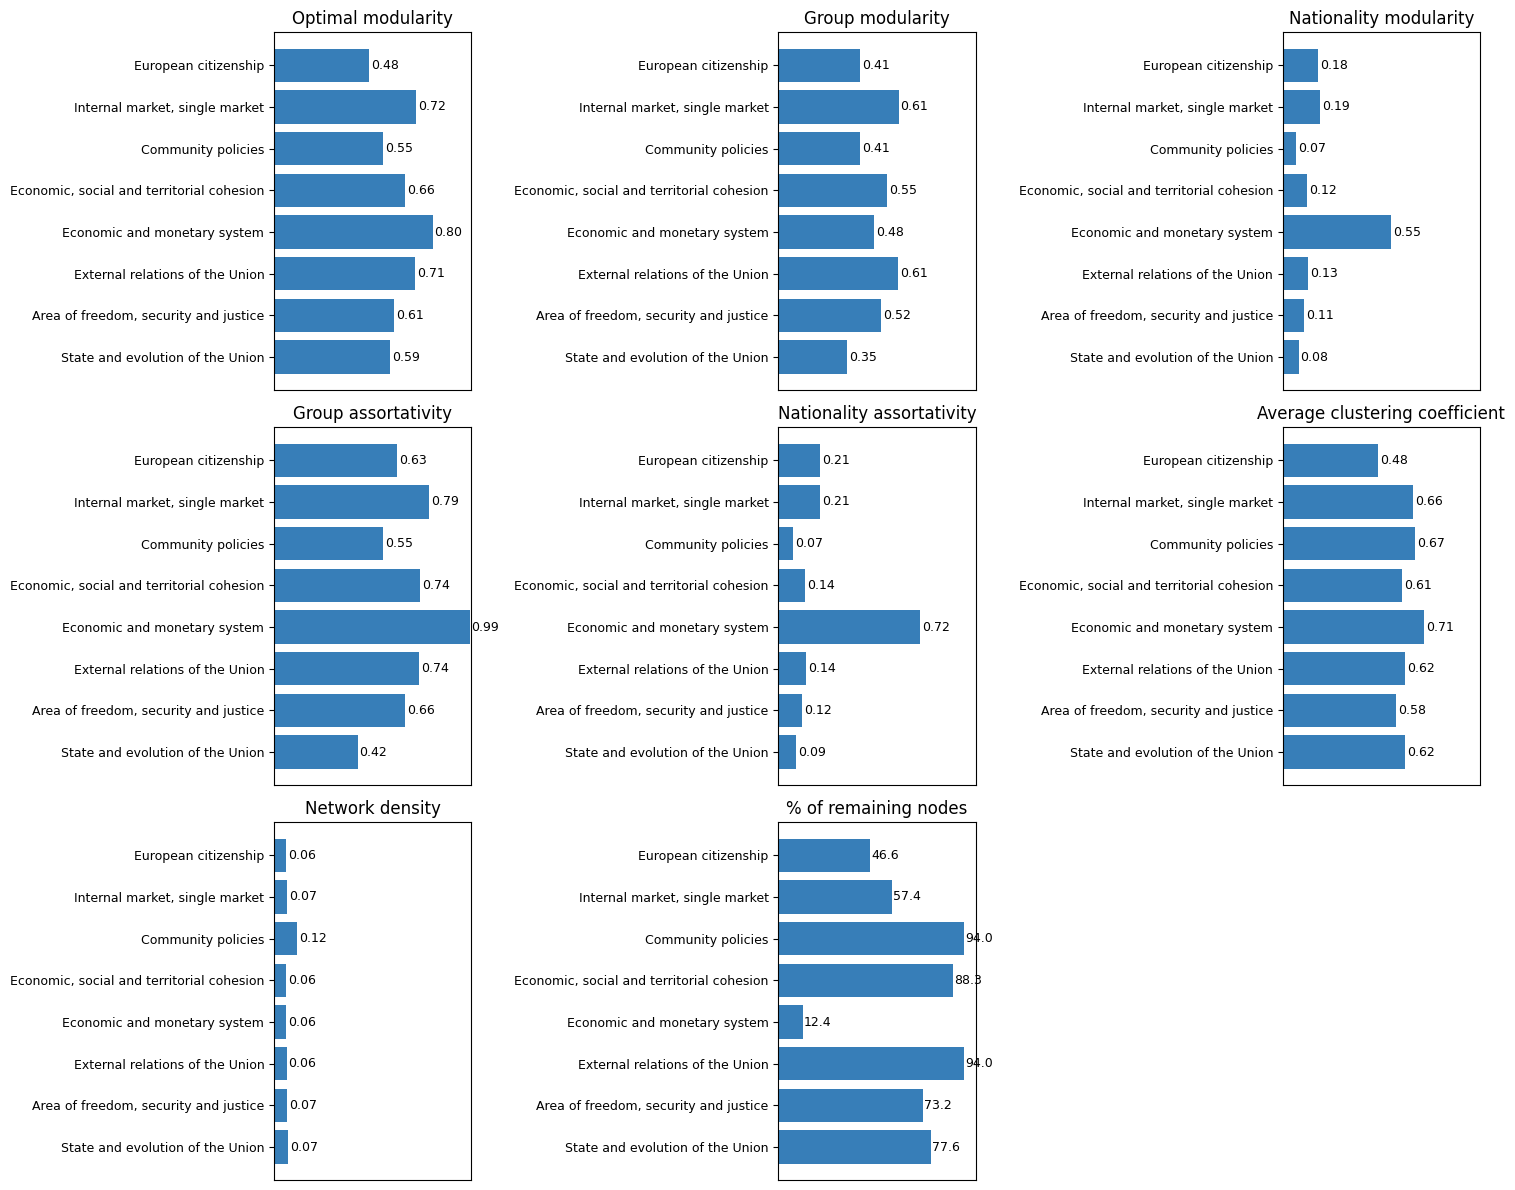

In [190]:
plot_network_statistics_barplots(df_network_features)

## 4. Secondary subjects
<a id="#Secondary-subjects"></a>

### 4.1. Budget of the Union
<a id="Budget-of-the-Union"></a>

In [191]:
# Filter for only bills whose secondary subject is Budget of the Union (among any other possible subjects)
secondary_1 = secondary_subject_bills[secondary_subject_bills["secondary_subject"] == "Budget of the Union"]

In [192]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose secondary subject is Budget of the Union (among any other possible subjects)
member_votes_secondary_1 = member_votes[member_votes['id_bill'].isin(secondary_1['id_bill'])]

In [193]:
# Create the agents and artifacts for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
all_bills_secondary_1 = create_agents_and_artifacts(member_votes_secondary_1)

all_bills_secondary_1

,name,bill_4,bill_5,bill_6,bill_7,bill_8,bill_15,bill_16,bill_24,bill_25,...,bill_1834,bill_1840,bill_1842,bill_1856,bill_1863,bill_1865,bill_1866,bill_1891,bill_1893,bill_1896
0,Charles GOERENS (LUX-RENEW),1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,0,1,0,...,1,1,1,1,0,0,0,1,1,1
3,Markus FERBER (DEU-EPP),1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [194]:
# Save the agents and artifacts for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
all_bills_secondary_1.to_csv("../matrices_and_networks/secondary_subjects/budget_of_the_union/agents_and_artifacts_secondary_1.csv", index=False)

In [195]:
# Load the edgelist for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
edgelist_secondary_1 = pd.read_csv("../matrices_and_networks/secondary_subjects/budget_of_the_union/edgelist_secondary_1.csv")

# Visualize the edgelist for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
edgelist_secondary_1

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Frédérique RIES (BEL-RENEW),1
2,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
3,Constanze KREHL (DEU-SD),Brice HORTEFEUX (FRA-EPP),1
4,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
...,...,...,...
9710,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
9711,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
9712,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
9713,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [196]:
# Create the cleaned edgelist of all bills whose secondary subject is Budget of the Union (among any other possible subjects)
cleaned_edgelist_secondary_1 = create_clean_edgelist(edgelist_secondary_1)

cleaned_edgelist_secondary_1

,Source,Target
0,2,10
1,2,15
2,2,20
3,2,31
4,2,46
...,...,...
9710,813,816
9711,813,817
9712,815,816
9713,815,817


In [197]:
# Compute the optimal modularity for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
optimal_modularity_secondary_1 = compute_optimal_modularity(cleaned_edgelist_secondary_1)

optimal_modularity_secondary_1

0.5044580688585044

In [198]:
# Compute the group modularity for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
group_modularity_secondary_1 = compute_group_modularity(cleaned_edgelist_secondary_1)

group_modularity_secondary_1

0.25511411300287745

In [199]:
# Compute the nationality modularity for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
nationality_modularity_secondary_1 = compute_nationality_modularity(cleaned_edgelist_secondary_1)

nationality_modularity_secondary_1

0.07473680808868499

In [200]:
# Compute the group assortativity for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
group_assortativity_secondary_1 = compute_group_assortativity(cleaned_edgelist_secondary_1)

group_assortativity_secondary_1

0.31025276412084857

In [201]:
# Compute the nationality assortativity for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
nationality_assortativity_secondary_1 = compute_nationality_assortativity(cleaned_edgelist_secondary_1)

nationality_assortativity_secondary_1

0.08147935614463346

In [202]:
# Compute the average clustering coefficient for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
average_clustering_coefficient_secondary_1 = compute_average_clustering_coefficient(cleaned_edgelist_secondary_1)

average_clustering_coefficient_secondary_1

0.6822210469568353

In [203]:
# Compute the network density for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
network_density_secondary_1 = compute_network_density(cleaned_edgelist_secondary_1)

network_density_secondary_1

0.10291858678955453

In [204]:
# Compute the percentage of remaining nodes for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
percentage_remaining_nodes_secondary_1 = compute_percentage_of_remaining_nodes(cleaned_edgelist_secondary_1)

percentage_remaining_nodes_secondary_1

62.589928057553955

In [205]:
# Compute the total detected communities for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
total_communities_secondary_1 = compute_total_detected_communities(cleaned_edgelist_secondary_1)

total_communities_secondary_1

41

The network is **disconnected** with 15 components.
Removed 14 small components (<30 nodes).


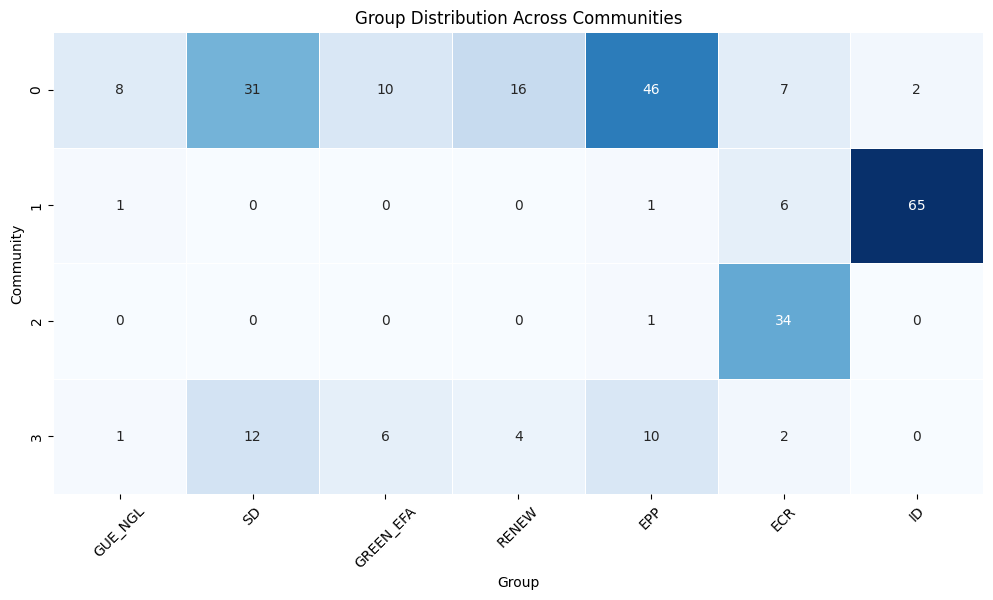

In [206]:
# Visualize the relevant communities obtained for all bills whose secondary subject is Budget of the Union (among any other possible subjects)
community_results_secondary_1 = analyze_communities(cleaned_edgelist_secondary_1)

plot_community_heatmap(community_results_secondary_1)

In [207]:
# Export the edges file as a CSV
cleaned_edgelist_secondary_1.to_csv("../matrices_and_networks/secondary_subjects/budget_of_the_union/edges.csv", index=False)

In [208]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_secondary_1
unique_mep_ids = set(cleaned_edgelist_secondary_1['Source']).union(set(cleaned_edgelist_secondary_1['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/secondary_subjects/budget_of_the_union/nodes.csv", index=False)

### 4.2. Common foreign and security policy (CFSP)
<a id="Common-foreign-and-security-policy-CFSP"></a>

In [209]:
# Filter for only bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
secondary_2 = secondary_subject_bills[secondary_subject_bills["secondary_subject"] == "Common foreign and security policy (CFSP)"]

In [210]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
member_votes_secondary_2 = member_votes[member_votes['id_bill'].isin(secondary_2['id_bill'])]

In [211]:
# Create the agents and artifacts for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
all_bills_secondary_2 = create_agents_and_artifacts(member_votes_secondary_2)

all_bills_secondary_2

,name,bill_0,bill_2,bill_11,bill_12,bill_13,bill_35,bill_38,bill_39,bill_40,...,bill_1743,bill_1747,bill_1749,bill_1750,bill_1875,bill_1897,bill_1898,bill_1899,bill_1900,bill_1901
0,Charles GOERENS (LUX-RENEW),1,1,1,0,1,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,0,1,0,1,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Markus FERBER (DEU-EPP),1,1,1,0,1,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,1,0,1,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1


In [212]:
# Save the agents and artifacts for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
all_bills_secondary_2.to_csv("../matrices_and_networks/secondary_subjects/common_foreign_and_security_policy/agents_and_artifacts_secondary_2.csv", index=False)

In [213]:
# Load the edgelist for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
edgelist_secondary_2 = pd.read_csv("../matrices_and_networks/secondary_subjects/common_foreign_and_security_policy/edgelist_secondary_2.csv")

# Visualize the edgelist for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
edgelist_secondary_2

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Fabienne KELLER (FRA-RENEW),1
1,Charles GOERENS (LUX-RENEW),Sophia IN 'T VELD (NLD-RENEW),1
2,Charles GOERENS (LUX-RENEW),Petras AUŠTREVIČIUS (LTU-RENEW),1
3,Charles GOERENS (LUX-RENEW),Nicola DANTI (ITA-RENEW),1
4,Charles GOERENS (LUX-RENEW),Valter FLEGO (HRV-RENEW),1
...,...,...,...
8868,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
8869,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
8870,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
8871,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [214]:
# Create the cleaned edgelist of all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
cleaned_edgelist_secondary_2 = create_clean_edgelist(edgelist_secondary_2)

cleaned_edgelist_secondary_2

,Source,Target
0,0,33
1,0,58
2,0,230
3,0,248
4,0,393
...,...,...
8868,813,816
8869,813,817
8870,815,816
8871,815,817


In [215]:
# Compute the optimal modularity for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
optimal_modularity_secondary_2 = compute_optimal_modularity(cleaned_edgelist_secondary_2)

optimal_modularity_secondary_2

0.741703376352908

In [216]:
# Compute the group modularity for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
group_modularity_secondary_2 = compute_group_modularity(cleaned_edgelist_secondary_2)

group_modularity_secondary_2

0.6357254603253604

In [217]:
# Compute the nationality modularity for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
nationality_modularity_secondary_2 = compute_nationality_modularity(cleaned_edgelist_secondary_2)

nationality_modularity_secondary_2

0.16300895429753456

In [218]:
# Compute the group assortativity for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
group_assortativity_secondary_2 = compute_group_assortativity(cleaned_edgelist_secondary_2)

group_assortativity_secondary_2

0.7725215949938754

In [219]:
# Compute the nationality assortativity for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
nationality_assortativity_secondary_2 = compute_nationality_assortativity(cleaned_edgelist_secondary_2)

nationality_assortativity_secondary_2

0.17807326513062377

In [220]:
# Compute the average clustering coefficient for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
average_clustering_coefficient_secondary_2 = compute_average_clustering_coefficient(cleaned_edgelist_secondary_2)

average_clustering_coefficient_secondary_2

0.6029811469830233

In [221]:
# Compute the network density for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
network_density_secondary_2 = compute_network_density(cleaned_edgelist_secondary_2)

network_density_secondary_2

0.04352902507346412

In [222]:
# Compute the percentage of remaining nodes for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
percentage_remaining_nodes_secondary_2 = compute_percentage_of_remaining_nodes(cleaned_edgelist_secondary_2)

percentage_remaining_nodes_secondary_2

91.94244604316548

In [223]:
# Compute the total detected communities for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
total_communities_secondary_2 = compute_total_detected_communities(cleaned_edgelist_secondary_2)

total_communities_secondary_2

18

The network is **disconnected** with 3 components.
Removed 2 small components (<30 nodes).


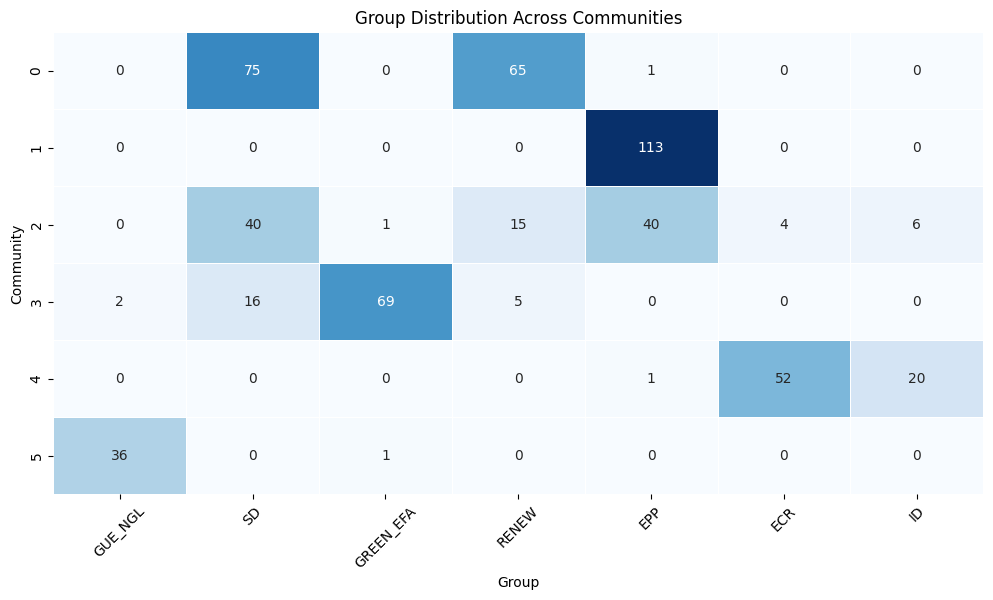

In [224]:
# Visualize the relevant communities obtained for all bills whose secondary subject is Common foreign and security policy (CFSP) (among any other possible subjects)
community_results_secondary_2 = analyze_communities(cleaned_edgelist_secondary_2)

plot_community_heatmap(community_results_secondary_2)

In [225]:
# Export the edges file as a CSV
cleaned_edgelist_secondary_2.to_csv("../matrices_and_networks/secondary_subjects/common_foreign_and_security_policy/edges.csv", index=False)

In [226]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_secondary_2
unique_mep_ids = set(cleaned_edgelist_secondary_2['Source']).union(set(cleaned_edgelist_secondary_2['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/secondary_subjects/common_foreign_and_security_policy/nodes.csv", index=False)

### 4.3. Environmental policy
<a id="Environmental-policy"></a>

In [227]:
# Filter for only bills whose secondary subject is Environmental policy (among any other possible subjects)
secondary_3 = secondary_subject_bills[secondary_subject_bills["secondary_subject"] == "Environmental policy"]

In [228]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose secondary subject is Environmental policy (among any other possible subjects)
member_votes_secondary_3 = member_votes[member_votes['id_bill'].isin(secondary_3['id_bill'])]

In [229]:
# Create the agents and artifacts for all bills whose secondary subject is Environmental policy (among any other possible subjects)
all_bills_secondary_3 = create_agents_and_artifacts(member_votes_secondary_3)

all_bills_secondary_3

,name,bill_5,bill_31,bill_32,bill_34,bill_52,bill_54,bill_58,bill_64,bill_79,...,bill_1753,bill_1756,bill_1769,bill_1835,bill_1837,bill_1839,bill_1868,bill_1872,bill_1881,bill_1886
0,Charles GOERENS (LUX-RENEW),1,1,0,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,0
3,Markus FERBER (DEU-EPP),1,1,1,0,1,1,1,0,1,...,1,1,0,1,1,0,1,1,0,1
4,Peter LIESE (DEU-EPP),1,1,1,0,0,1,1,0,1,...,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,0,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [230]:
# Save the agents and artifacts for all bills whose secondary subject is Environmental policy (among any other possible subjects)
all_bills_secondary_3.to_csv("../matrices_and_networks/secondary_subjects/environmental_policy/agents_and_artifacts_3.csv", index=False)

In [231]:
# Load the edgelist for all bills whose secondary subject is Environmental policy (among any other possible subjects)
edgelist_secondary_3 = pd.read_csv("../matrices_and_networks/secondary_subjects/environmental_policy/edgelist_secondary_3.csv")

# Visualize the edgelist for all bills whose secondary subject is Environmental policy (among any other possible subjects)
edgelist_secondary_3

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
2,Constanze KREHL (DEU-SD),Michèle RIVASI (FRA-GREEN_EFA),1
3,Constanze KREHL (DEU-SD),Ismail ERTUG (DEU-SD),1
4,Constanze KREHL (DEU-SD),Michal ŠIMEČKA (SVK-RENEW),1
...,...,...,...
5195,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
5196,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
5197,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
5198,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [232]:
# Create the cleaned edgelist of all bills whose secondary subject is Environmental policy (among any other possible subjects)
cleaned_edgelist_secondary_3 = create_clean_edgelist(edgelist_secondary_3)

cleaned_edgelist_secondary_3

,Source,Target
0,2,10
1,2,46
2,2,122
3,2,149
4,2,186
...,...,...
5195,813,816
5196,813,817
5197,815,816
5198,815,817


In [233]:
# Compute the optimal modularity for all bills whose secondary subject is Environmental policy (among any other possible subjects)
optimal_modularity_secondary_3 = compute_optimal_modularity(cleaned_edgelist_secondary_3)

optimal_modularity_secondary_3

0.6620627773668637

In [234]:
# Compute the group modularity for all bills whose secondary subject is Environmental policy (among any other possible subjects)
group_modularity_secondary_3 = compute_group_modularity(cleaned_edgelist_secondary_3)

group_modularity_secondary_3

0.579590625

In [235]:
# Compute the nationality modularity for all bills whose secondary subject is Environmental policy (among any other possible subjects)
nationality_modularity_secondary_3 = compute_nationality_modularity(cleaned_edgelist_secondary_3)

nationality_modularity_secondary_3

0.202763701923077

In [236]:
# Compute the group assortativity for all bills whose secondary subject is Environmental policy (among any other possible subjects)
group_assortativity_secondary_3 = compute_group_assortativity(cleaned_edgelist_secondary_3)

group_assortativity_secondary_3

0.7410785994270164

In [237]:
# Compute the nationality assortativity for all bills whose secondary subject is Environmental policy (among any other possible subjects)
nationality_assortativity_secondary_3 = compute_nationality_assortativity(cleaned_edgelist_secondary_3)

nationality_assortativity_secondary_3

0.23135513702115013

In [238]:
# Compute the average clustering coefficient for all bills whose secondary subject is Environmental policy (among any other possible subjects)
average_clustering_coefficient_secondary_3 = compute_average_clustering_coefficient(cleaned_edgelist_secondary_3)

average_clustering_coefficient_secondary_3

0.6175842511712104

In [239]:
# Compute the network density for all bills whose secondary subject is Environmental policy (among any other possible subjects)
network_density_secondary_3 = compute_network_density(cleaned_edgelist_secondary_3)

network_density_secondary_3

0.05433476484540715

In [240]:
# Compute the percentage of remaining nodes for all bills whose secondary subject is Environmental policy (among any other possible subjects)
percentage_remaining_nodes_secondary_3 = compute_percentage_of_remaining_nodes(cleaned_edgelist_secondary_3)

percentage_remaining_nodes_secondary_3

63.021582733812956

In [241]:
# Compute the total detected communities for all bills whose secondary subject is Environmental policy (among any other possible subjects)
total_communities_secondary_3 = compute_total_detected_communities(cleaned_edgelist_secondary_3)

total_communities_secondary_3

28

The network is **disconnected** with 8 components.
Removed 7 small components (<30 nodes).


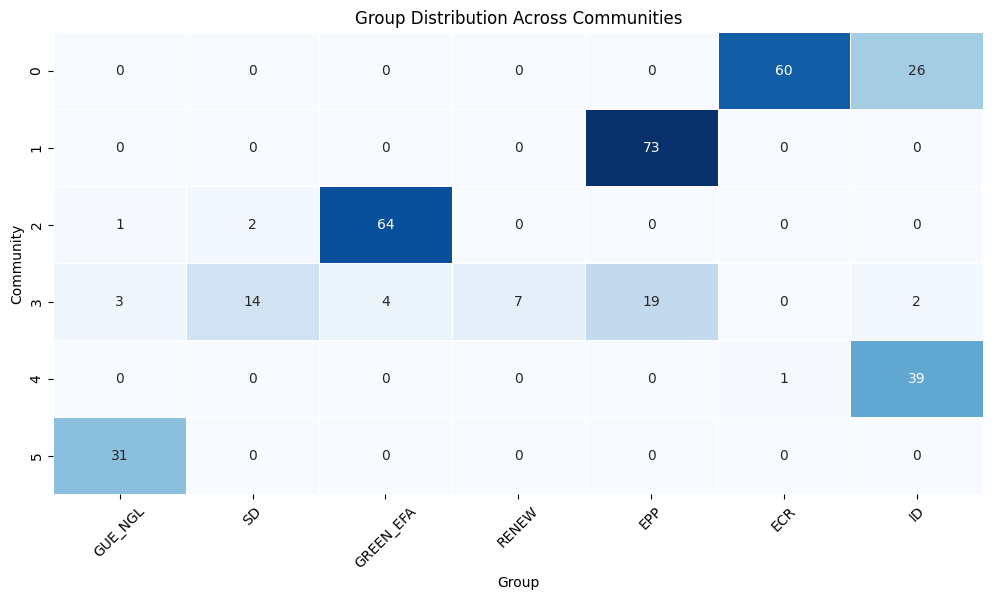

In [242]:
# Visualize the relevant communities obtained for all bills whose secondary subject is Environmental policy (among any other possible subjects)
community_results_secondary_3 = analyze_communities(cleaned_edgelist_secondary_3)

plot_community_heatmap(community_results_secondary_3)

In [243]:
# Export the edges file as a CSV
cleaned_edgelist_secondary_3.to_csv("../matrices_and_networks/secondary_subjects/environmental_policy/edges.csv", index=False)

In [244]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_secondary_3
unique_mep_ids = set(cleaned_edgelist_secondary_3['Source']).union(set(cleaned_edgelist_secondary_3['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/secondary_subjects/environmental_policy/nodes.csv", index=False)

### 4.4. Social policy, social charter and protocol
<a id="Social-policy-social-charter-and-protocol"></a>

In [245]:
# Filter for only bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
secondary_4 = secondary_subject_bills[secondary_subject_bills["secondary_subject"] == "Social policy, social charter and protocol"]

In [246]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
member_votes_secondary_4 = member_votes[member_votes['id_bill'].isin(secondary_4['id_bill'])]

In [247]:
# Create the agents and artifacts for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
all_bills_secondary_4 = create_agents_and_artifacts(member_votes_secondary_4)

all_bills_secondary_4

,name,bill_11,bill_18,bill_51,bill_63,bill_86,bill_116,bill_118,bill_119,bill_207,...,bill_1746,bill_1749,bill_1757,bill_1774,bill_1846,bill_1848,bill_1875,bill_1876,bill_1883,bill_1901
0,Charles GOERENS (LUX-RENEW),1,1,0,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,0,1,0,0,1
3,Markus FERBER (DEU-EPP),1,0,0,0,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,1,0,0,1,1,0,0,1,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [248]:
# Save the agents and artifacts for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
all_bills_secondary_4.to_csv("../matrices_and_networks/secondary_subjects/social_policy_social_charter_and_protocol/agents_and_artifacts_4.csv", index=False)

In [249]:
# Load the edgelist for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
edgelist_secondary_4 = pd.read_csv("../matrices_and_networks/secondary_subjects/social_policy_social_charter_and_protocol/edgelist_secondary_4.csv")

# Visualize the edgelist for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
edgelist_secondary_4

,from,to,weight
0,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
1,Constanze KREHL (DEU-SD),Ismail ERTUG (DEU-SD),1
2,Constanze KREHL (DEU-SD),Michal ŠIMEČKA (SVK-RENEW),1
3,Constanze KREHL (DEU-SD),Eric ANDRIEU (FRA-SD),1
4,Constanze KREHL (DEU-SD),Eleonora EVI (ITA-GREEN_EFA),1
...,...,...,...
4383,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
4384,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
4385,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
4386,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [250]:
# Create the cleaned edgelist of all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
cleaned_edgelist_secondary_4 = create_clean_edgelist(edgelist_secondary_4)

cleaned_edgelist_secondary_4

,Source,Target
0,2,46
1,2,149
2,2,186
3,2,195
4,2,234
...,...,...
4383,813,816
4384,813,817
4385,815,816
4386,815,817


In [251]:
# Compute the optimal modularity for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
optimal_modularity_secondary_4 = compute_optimal_modularity(cleaned_edgelist_secondary_4)

optimal_modularity_secondary_4

0.42060990901680134

In [252]:
# Compute the group modularity for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
group_modularity_secondary_4 = compute_group_modularity(cleaned_edgelist_secondary_4)

group_modularity_secondary_4

0.3240262921832894

In [253]:
# Compute the nationality modularity for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
nationality_modularity_secondary_4 = compute_nationality_modularity(cleaned_edgelist_secondary_4)

nationality_modularity_secondary_4

0.17481509819188654

In [254]:
# Compute the group assortativity for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
group_assortativity_secondary_4 = compute_group_assortativity(cleaned_edgelist_secondary_4)

group_assortativity_secondary_4

0.47875758180929795

In [255]:
# Compute the nationality assortativity for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
nationality_assortativity_secondary_4 = compute_nationality_assortativity(cleaned_edgelist_secondary_4)

nationality_assortativity_secondary_4

0.2086130424637273

In [256]:
# Compute the average clustering coefficient for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
average_clustering_coefficient_secondary_4 = compute_average_clustering_coefficient(cleaned_edgelist_secondary_4)

average_clustering_coefficient_secondary_4

0.5947794423914962

In [257]:
# Compute the network density for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
network_density_secondary_4 = compute_network_density(cleaned_edgelist_secondary_4)

network_density_secondary_4

0.07394674755645433

In [258]:
# Compute the percentage of remaining nodes for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
percentage_remaining_nodes_secondary_4 = compute_percentage_of_remaining_nodes(cleaned_edgelist_secondary_4)

percentage_remaining_nodes_secondary_4

49.64028776978417

In [259]:
# Compute the total detected communities for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
total_communities_secondary_4 = compute_total_detected_communities(cleaned_edgelist_secondary_4)

total_communities_secondary_4

79

The network is **disconnected** with 20 components.
Removed 19 small components (<30 nodes).


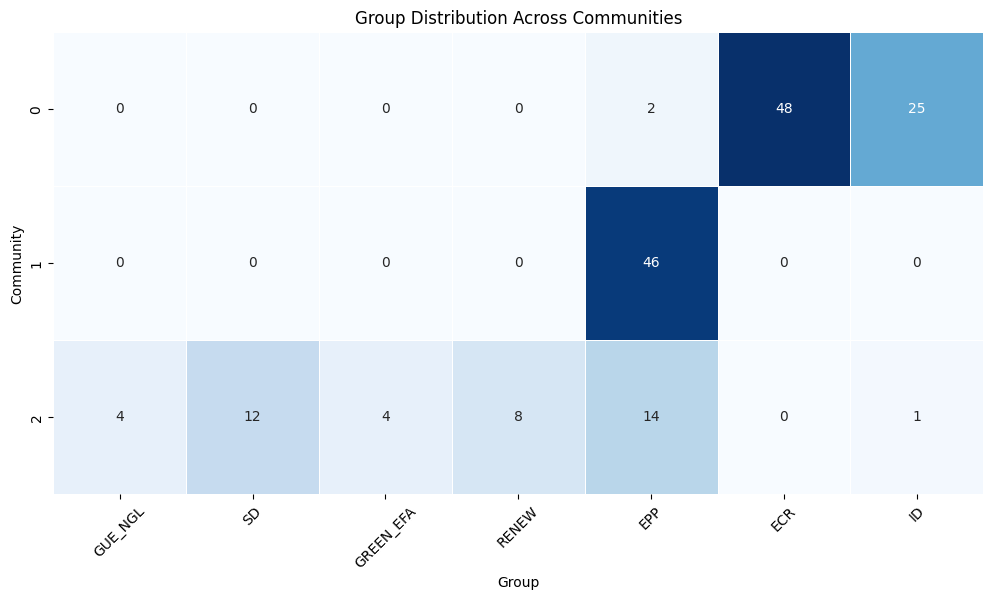

In [260]:
# Visualize the relevant communities obtained for all bills whose secondary subject is Social policy, social charter and protocol (among any other possible subjects)
community_results_secondary_4 = analyze_communities(cleaned_edgelist_secondary_4)

plot_community_heatmap(community_results_secondary_4)

In [261]:
# Export the edges file as a CSV
cleaned_edgelist_secondary_4.to_csv("../matrices_and_networks/secondary_subjects/social_policy_social_charter_and_protocol/edges.csv", index=False)

In [262]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_secondary_4
unique_mep_ids = set(cleaned_edgelist_secondary_4['Source']).union(set(cleaned_edgelist_secondary_4['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/secondary_subjects/social_policy_social_charter_and_protocol/nodes.csv", index=False)

### 4.5. Agricultural policy and economies
<a id="Agricultural-policy-and-economies"></a>

In [263]:
# Filter for only bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
secondary_5 = secondary_subject_bills[secondary_subject_bills["secondary_subject"] == "Agricultural policy and economies"]

In [264]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
member_votes_secondary_5 = member_votes[member_votes['id_bill'].isin(secondary_5['id_bill'])]

In [265]:
# Create the agents and artifacts for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
all_bills_secondary_5 = create_agents_and_artifacts(member_votes_secondary_5)

all_bills_secondary_5

,name,bill_19,bill_20,bill_21,bill_22,bill_23,bill_32,bill_44,bill_45,bill_46,...,bill_1691,bill_1708,bill_1732,bill_1835,bill_1837,bill_1847,bill_1868,bill_1881,bill_1888,bill_1894
0,Charles GOERENS (LUX-RENEW),1,0,0,0,0,0,1,1,1,...,1,1,1,1,1,0,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
3,Markus FERBER (DEU-EPP),0,0,0,0,0,1,0,0,0,...,1,1,1,1,1,1,1,0,1,0
4,Peter LIESE (DEU-EPP),0,0,0,0,0,1,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,1,0,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,0,1,0
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,0,1


In [266]:
# Save the agents and artifacts for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
all_bills_secondary_5.to_csv("../matrices_and_networks/secondary_subjects/agricultural_policy_and_economies/agents_and_artifacts_5.csv", index=False)

In [267]:
# Load the edgelist for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
edgelist_secondary_5 = pd.read_csv("../matrices_and_networks/secondary_subjects/agricultural_policy_and_economies/edgelist_secondary_5.csv")

# Visualize the edgelist for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
edgelist_secondary_5

,from,to,weight
0,Charles GOERENS (LUX-RENEW),Peter LIESE (DEU-EPP),1
1,Charles GOERENS (LUX-RENEW),Jan HUITEMA (NLD-RENEW),1
2,Charles GOERENS (LUX-RENEW),Seán KELLY (IRL-EPP),1
3,Charles GOERENS (LUX-RENEW),Morten LØKKEGAARD (DNK-RENEW),1
4,Charles GOERENS (LUX-RENEW),Maria da Graça CARVALHO (PRT-EPP),1
...,...,...,...
14892,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),Camilla LAURETI (ITA-SD),1
14893,Ilan DE BASSO (SWE-SD),Catharina RINZEMA (NLD-RENEW),1
14894,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
14895,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1


In [268]:
# Create the cleaned edgelist of all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
cleaned_edgelist_secondary_5 = create_clean_edgelist(edgelist_secondary_5)

cleaned_edgelist_secondary_5

,Source,Target
0,0,7
1,0,98
2,0,108
3,0,114
4,0,153
...,...,...
14892,811,817
14893,813,815
14894,813,816
14895,813,817


In [269]:
# Compute the optimal modularity for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
optimal_modularity_secondary_5 = compute_optimal_modularity(cleaned_edgelist_secondary_5)

optimal_modularity_secondary_5

0.396211378908031

In [270]:
# Compute the group modularity for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
group_modularity_secondary_5 = compute_group_modularity(cleaned_edgelist_secondary_5)

group_modularity_secondary_5

0.29038407604586197

In [271]:
# Compute the nationality modularity for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
nationality_modularity_secondary_5 = compute_nationality_modularity(cleaned_edgelist_secondary_5)

nationality_modularity_secondary_5

0.07209469220589602

In [272]:
# Compute the group assortativity for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
group_assortativity_secondary_5 = compute_group_assortativity(cleaned_edgelist_secondary_5)

group_assortativity_secondary_5

0.4418258764450961

In [273]:
# Compute the nationality assortativity for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
nationality_assortativity_secondary_5 = compute_nationality_assortativity(cleaned_edgelist_secondary_5)

nationality_assortativity_secondary_5

0.07967913477890211

In [274]:
# Compute the average clustering coefficient for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
average_clustering_coefficient_secondary_5 = compute_average_clustering_coefficient(cleaned_edgelist_secondary_5)

average_clustering_coefficient_secondary_5

0.7253218645921738

In [275]:
# Compute the network density for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
network_density_secondary_5 = compute_network_density(cleaned_edgelist_secondary_5)

network_density_secondary_5

0.12640108608035297

In [276]:
# Compute the percentage of remaining nodes for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
percentage_remaining_nodes_secondary_5 = compute_percentage_of_remaining_nodes(cleaned_edgelist_secondary_5)

percentage_remaining_nodes_secondary_5

69.92805755395683

In [277]:
# Compute the total detected communities for all bills whose secondary subjet is Agricultural policy and economies (among any other possible subjects)
total_communities_secondary_5 = compute_total_detected_communities(cleaned_edgelist_secondary_5)

total_communities_secondary_5

55

The network is **disconnected** with 11 components.
Removed 10 small components (<30 nodes).


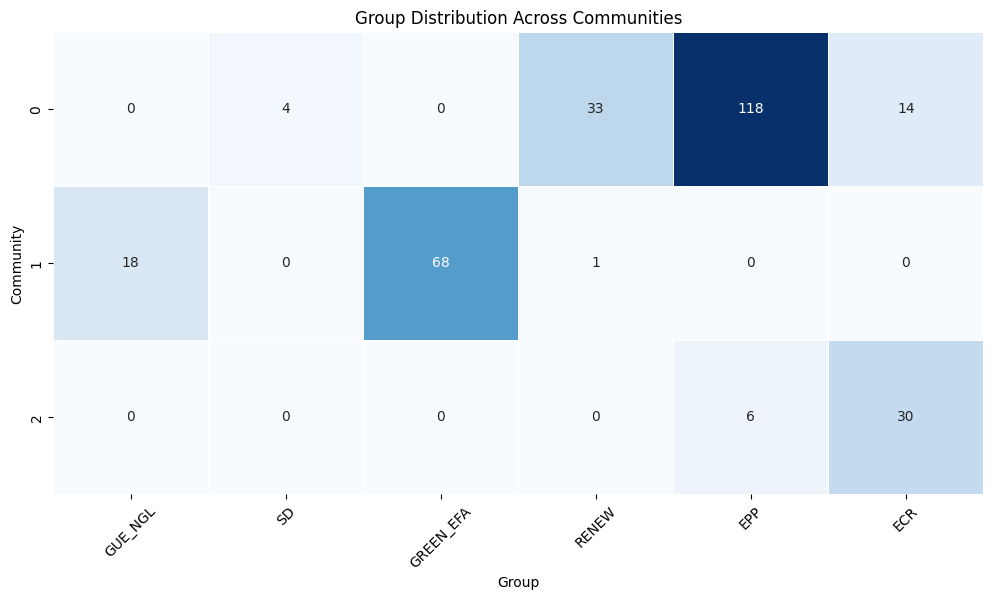

In [278]:
# Visualize the relevant communities obtained for all bills whose secondary subject is Agricultural policy and economies (among any other possible subjects)
community_results_secondary_5 = analyze_communities(cleaned_edgelist_secondary_5)

plot_community_heatmap(community_results_secondary_5)

In [279]:
# Export the edges file as a CSV
cleaned_edgelist_secondary_5.to_csv("../matrices_and_networks/secondary_subjects/agricultural_policy_and_economies/edges.csv", index=False)

In [280]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_secondary_5
unique_mep_ids = set(cleaned_edgelist_secondary_5['Source']).union(set(cleaned_edgelist_secondary_5['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/secondary_subjects/agricultural_policy_and_economies/nodes.csv", index=False)

### 4.6. Relations with third countries
<a id="Relations-with-third-countries"></a>

In [281]:
# Filter for only bills whose secondary subject is Relations with third countries (among any other possible subjects)
secondary_6 = secondary_subject_bills[secondary_subject_bills["secondary_subject"] == "Relations with third countries"]

In [282]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose secondary subject is Relations with third countries (among any other possible subjects)
member_votes_secondary_6 = member_votes[member_votes['id_bill'].isin(secondary_6['id_bill'])]

In [283]:
# Create the agents and artifacts for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
all_bills_secondary_6 = create_agents_and_artifacts(member_votes_secondary_6)

all_bills_secondary_6

,name,bill_57,bill_58,bill_67,bill_71,bill_117,bill_118,bill_192,bill_200,bill_217,...,bill_1745,bill_1764,bill_1766,bill_1775,bill_1776,bill_1777,bill_1833,bill_1851,bill_1879,bill_1897
0,Charles GOERENS (LUX-RENEW),1,0,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),0,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,1,0,1,1
3,Markus FERBER (DEU-EPP),0,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Peter LIESE (DEU-EPP),0,1,1,1,1,0,1,1,1,...,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1


In [284]:
# Save the agents and artifacts for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
all_bills_secondary_6.to_csv("../matrices_and_networks/secondary_subjects/relations_with_third_countries/agents_and_artifacts_6.csv", index=False)

In [285]:
# Load the edgelist for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
edgelist_secondary_6 = pd.read_csv("../matrices_and_networks/secondary_subjects/relations_with_third_countries/edgelist_secondary_6.csv")

# Visualize the edgelist for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
edgelist_secondary_6

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
2,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
3,Constanze KREHL (DEU-SD),Aldo PATRICIELLO (ITA-EPP),1
4,Constanze KREHL (DEU-SD),Ismail ERTUG (DEU-SD),1
...,...,...,...
3266,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
3267,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
3268,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
3269,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [286]:
# Create the cleaned edgelist of all bills whose secondary subject is Relations with third countries (among any other possible subjects)
cleaned_edgelist_secondary_6 = create_clean_edgelist(edgelist_secondary_6)

cleaned_edgelist_secondary_6

,Source,Target
0,2,10
1,2,20
2,2,46
3,2,86
4,2,149
...,...,...
3266,813,816
3267,813,817
3268,815,816
3269,815,817


In [287]:
# Compute the optimal modularity for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
optimal_modularity_secondary_6 = compute_optimal_modularity(cleaned_edgelist_secondary_6)

optimal_modularity_secondary_6

0.749958993184784

In [288]:
# Compute the group modularity for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
group_modularity_secondary_6 = compute_group_modularity(cleaned_edgelist_secondary_6)

group_modularity_secondary_6

0.6361726748154413

In [289]:
# Compute the nationality modularity for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
nationality_modularity_secondary_6 = compute_nationality_modularity(cleaned_edgelist_secondary_6)

nationality_modularity_secondary_6

0.2389371089573745

In [290]:
# Compute the group assortativity for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
group_assortativity_secondary_6 = compute_group_assortativity(cleaned_edgelist_secondary_6)

group_assortativity_secondary_6

0.8360735316154992

In [291]:
# Compute the nationality assortativity for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
nationality_assortativity_secondary_6 = compute_nationality_assortativity(cleaned_edgelist_secondary_6)

nationality_assortativity_secondary_6

0.26898855993428095

In [292]:
# Compute the average clustering coefficient for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
average_clustering_coefficient_secondary_6 = compute_average_clustering_coefficient(cleaned_edgelist_secondary_6)

average_clustering_coefficient_secondary_6

0.7049954690119442

In [293]:
# Compute the network density for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
network_density_secondary_6 = compute_network_density(cleaned_edgelist_secondary_6)

network_density_secondary_6

0.06918651381192098

In [294]:
# Compute the percentage of remaining nodes for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
percentage_remaining_nodes_secondary_6 = compute_percentage_of_remaining_nodes(cleaned_edgelist_secondary_6)

percentage_remaining_nodes_secondary_6

44.31654676258992

In [295]:
# Compute the total detected communities for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
total_communities_secondary_6 = compute_total_detected_communities(cleaned_edgelist_secondary_6)

total_communities_secondary_6

16

The network is **disconnected** with 11 components.
Removed 10 small components (<30 nodes).


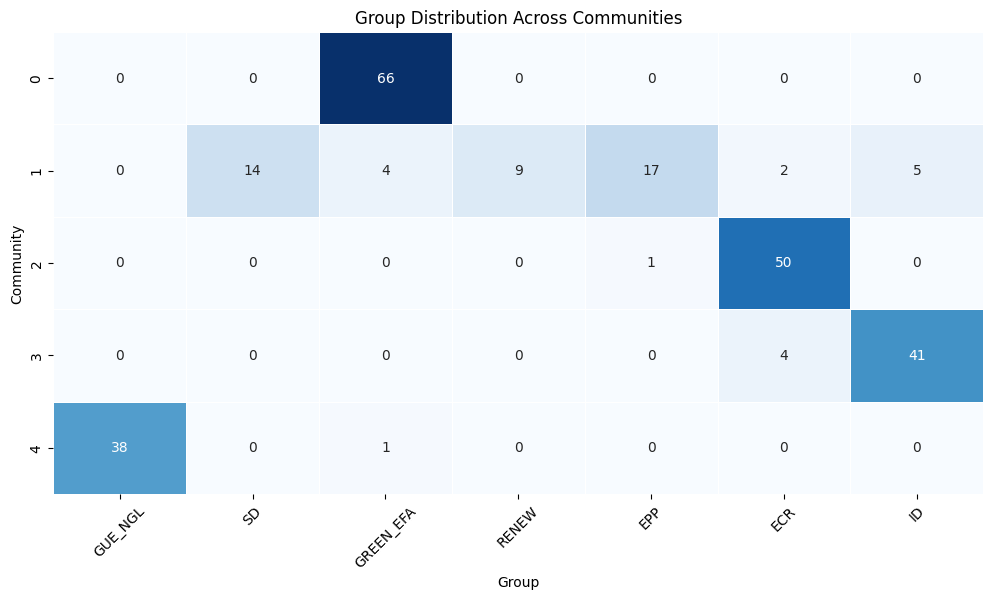

In [296]:
# Visualize the relevant communities obtained for all bills whose secondary subject is Relations with third countries (among any other possible subjects)
community_results_secondary_6 = analyze_communities(cleaned_edgelist_secondary_6)

plot_community_heatmap(community_results_secondary_6)

In [297]:
# Export the edges file as a CSV
cleaned_edgelist_secondary_6.to_csv("../matrices_and_networks/secondary_subjects/relations_with_third_countries/edges.csv", index=False)

In [298]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_secondary_6
unique_mep_ids = set(cleaned_edgelist_secondary_6['Source']).union(set(cleaned_edgelist_secondary_6['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/secondary_subjects/relations_with_third_countries/nodes.csv", index=False)

### 4.7. Common commercial policy in general
<a id="Common-commercial-policy-in-general"></a>

In [299]:
# Filter for only bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
secondary_7 = secondary_subject_bills[secondary_subject_bills["secondary_subject"] == "Common commercial policy in general"]

In [300]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
member_votes_secondary_7 = member_votes[member_votes['id_bill'].isin(secondary_7['id_bill'])]

In [301]:
# Create the agents and artifacts for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
all_bills_secondary_7 = create_agents_and_artifacts(member_votes_secondary_7)

all_bills_secondary_7

,name,bill_49,bill_55,bill_56,bill_59,bill_62,bill_67,bill_71,bill_106,bill_107,...,bill_1764,bill_1766,bill_1778,bill_1835,bill_1837,bill_1838,bill_1855,bill_1875,bill_1879,bill_1894
0,Charles GOERENS (LUX-RENEW),1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,Markus FERBER (DEU-EPP),1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,Peter LIESE (DEU-EPP),0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [302]:
# Save the agents and artifacts for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
all_bills_secondary_7.to_csv("../matrices_and_networks/secondary_subjects/common_commercial_policy_in_general/agents_and_artifacts_7.csv", index=False)

In [303]:
# Load the edgelist for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
edgelist_secondary_7 = pd.read_csv("../matrices_and_networks/secondary_subjects/common_commercial_policy_in_general/edgelist_secondary_7.csv")

# Visualize the edgelist for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
edgelist_secondary_7

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
2,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
3,Constanze KREHL (DEU-SD),Ismail ERTUG (DEU-SD),1
4,Constanze KREHL (DEU-SD),Michal ŠIMEČKA (SVK-RENEW),1
...,...,...,...
3205,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
3206,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
3207,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
3208,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [304]:
# Create the cleaned edgelist of all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
cleaned_edgelist_secondary_7 = create_clean_edgelist(edgelist_secondary_7)

cleaned_edgelist_secondary_7

,Source,Target
0,2,10
1,2,20
2,2,46
3,2,149
4,2,186
...,...,...
3205,813,816
3206,813,817
3207,815,816
3208,815,817


In [305]:
# Compute the optimal modularity for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
optimal_modularity_secondary_7 = compute_optimal_modularity(cleaned_edgelist_secondary_7)

optimal_modularity_secondary_7

0.7001184965208024

In [306]:
# Compute the group modularity for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
group_modularity_secondary_7 = compute_group_modularity(cleaned_edgelist_secondary_7)

group_modularity_secondary_7

0.5902754728700226

In [307]:
# Compute the nationality modularity for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
nationality_modularity_secondary_7 = compute_nationality_modularity(cleaned_edgelist_secondary_7)

nationality_modularity_secondary_7

0.2375456856979261

In [308]:
# Compute the group assortativity for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
group_assortativity_secondary_7 = compute_group_assortativity(cleaned_edgelist_secondary_7)

group_assortativity_secondary_7

0.8267725258618844

In [309]:
# Compute the nationality assortativity for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
nationality_assortativity_secondary_7 = compute_nationality_assortativity(cleaned_edgelist_secondary_7)

nationality_assortativity_secondary_7

0.2687280468141404

In [310]:
# Compute the average clustering coefficient for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
average_clustering_coefficient_secondary_7 = compute_average_clustering_coefficient(cleaned_edgelist_secondary_7)

average_clustering_coefficient_secondary_7

0.7345826167492322

In [311]:
# Compute the network density for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
network_density_secondary_7 = compute_network_density(cleaned_edgelist_secondary_7)

network_density_secondary_7

0.06969775924960916

In [312]:
# Compute the percentange of remaining nodes for all bills whose secondary subjcet is Common commercial policy in general (among any other possible subjects)
percentage_remaining_nodes_secondary_7 = compute_percentage_of_remaining_nodes(cleaned_edgelist_secondary_7)

percentage_remaining_nodes_secondary_7

43.7410071942446

In [313]:
# Compute the total detected communities for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
total_communities_secondary_7 = compute_total_detected_communities(cleaned_edgelist_secondary_7)

total_communities_secondary_7

14

The network is **disconnected** with 8 components.
Removed 7 small components (<30 nodes).


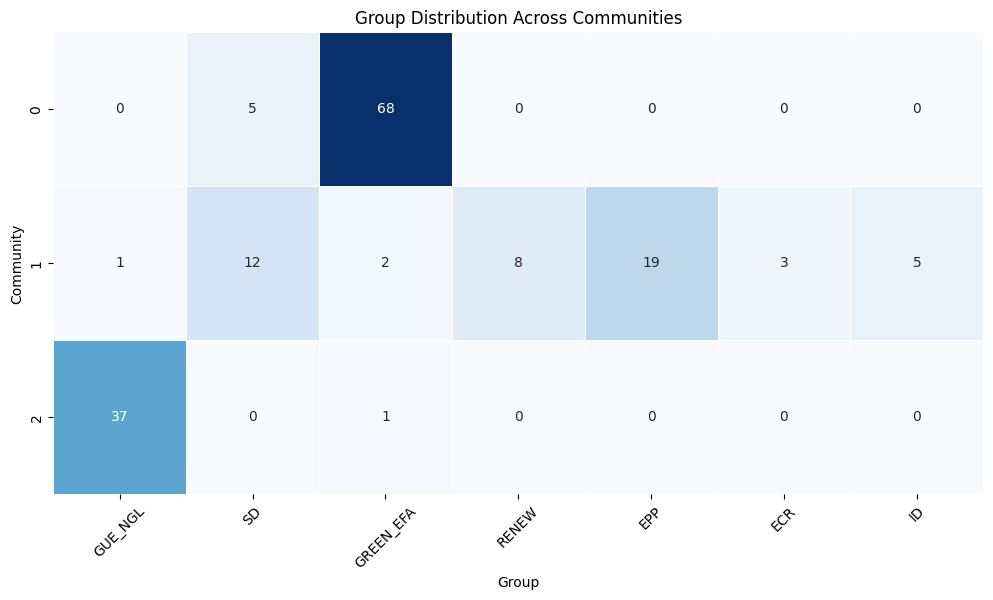

In [314]:
# Visualize the relevant communities obtained for all bills whose secondary subject is Common commercial policy in general (among any other possible subjects)
community_results_secondary_7 = analyze_communities(cleaned_edgelist_secondary_7)

plot_community_heatmap(community_results_secondary_7)

In [315]:
# Export the edges file as a CSV
cleaned_edgelist_secondary_7.to_csv("../matrices_and_networks/secondary_subjects/common_commercial_policy_in_general/edges.csv", index=False)

In [316]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_secondary_7
unique_mep_ids = set(cleaned_edgelist_secondary_7['Source']).union(set(cleaned_edgelist_secondary_7['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/secondary_subjects/common_commercial_policy_in_general/nodes.csv", index=False)

### 4.8. Information and communications in general
<a id="Information-and-communications-in-general"></a>

In [317]:
# Filter for only bills whose secondary subject is Information and communications in general (among any other possible subjects)
secondary_8 = secondary_subject_bills[secondary_subject_bills["secondary_subject"] == "Information and communications in general"]

In [318]:
# Filter the member_votes dataset to include only voting records corresponding to bills whose secondary subject is Information and communications in general (among any other possible subjects)
member_votes_secondary_8 = member_votes[member_votes['id_bill'].isin(secondary_8['id_bill'])]

In [319]:
# Create the agents and artifacts for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
all_bills_secondary_8 = create_agents_and_artifacts(member_votes_secondary_8)

all_bills_secondary_8

,name,bill_17,bill_80,bill_81,bill_114,bill_212,bill_213,bill_266,bill_287,bill_295,...,bill_1661,bill_1663,bill_1671,bill_1685,bill_1718,bill_1726,bill_1732,bill_1736,bill_1859,bill_1902
0,Charles GOERENS (LUX-RENEW),1,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Constanze KREHL (DEU-SD),1,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Bernd LANGE (DEU-SD),1,0,1,0,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
3,Markus FERBER (DEU-EPP),1,0,1,0,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
4,Peter LIESE (DEU-EPP),1,0,1,0,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Karolin BRAUNSBERGER-REINHOLD (DEU-EPP),0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
656,Ilan DE BASSO (SWE-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,1,1
657,Catharina RINZEMA (NLD-RENEW),0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
658,René REPASI (DEU-SD),0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1


In [320]:
# Save the agents and artifacts for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
all_bills_secondary_8.to_csv("../matrices_and_networks/secondary_subjects/information_and_communications_in_general/agents_and_artifacts_8.csv", index=False)

In [321]:
# Load the edgelist for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
edgelist_secondary_8 = pd.read_csv("../matrices_and_networks/secondary_subjects/information_and_communications_in_general/edgelist_secondary_8.csv")

# Visualize the edgelist for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
edgelist_secondary_8

,from,to,weight
0,Constanze KREHL (DEU-SD),Antonio TAJANI (ITA-EPP),1
1,Constanze KREHL (DEU-SD),Raffaele FITTO (ITA-ECR),1
2,Constanze KREHL (DEU-SD),Lefteris CHRISTOFOROU (CYP-EPP),1
3,Constanze KREHL (DEU-SD),Ismail ERTUG (DEU-SD),1
4,Constanze KREHL (DEU-SD),Michal ŠIMEČKA (SVK-RENEW),1
...,...,...,...
1573,Ilan DE BASSO (SWE-SD),René REPASI (DEU-SD),1
1574,Ilan DE BASSO (SWE-SD),Camilla LAURETI (ITA-SD),1
1575,Catharina RINZEMA (NLD-RENEW),René REPASI (DEU-SD),1
1576,Catharina RINZEMA (NLD-RENEW),Camilla LAURETI (ITA-SD),1


In [322]:
# Create the cleaned edgelist of all bills whose secondary subject is Information and communications in general (among any other possible subjects)
cleaned_edgelist_secondary_8 = create_clean_edgelist(edgelist_secondary_8)

cleaned_edgelist_secondary_8

,Source,Target
0,2,10
1,2,20
2,2,46
3,2,149
4,2,186
...,...,...
1573,813,816
1574,813,817
1575,815,816
1576,815,817


In [323]:
# Compute the optimal modularity for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
optimal_modularity_secondary_8 = compute_optimal_modularity(cleaned_edgelist_secondary_8)

optimal_modularity_secondary_8

0.7890468755270904

In [324]:
# Compute the group modularity for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
group_modularity_secondary_8 = compute_group_modularity(cleaned_edgelist_secondary_8)

group_modularity_secondary_8

0.5935478481850411

In [325]:
# Compute the nationality modularity for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
nationality_modularity_secondary_8 = compute_nationality_modularity(cleaned_edgelist_secondary_8)

nationality_modularity_secondary_8

0.44741663333445786

In [326]:
# Compute the group assortativity for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
group_assortativity_secondary_8 = compute_group_assortativity(cleaned_edgelist_secondary_8)

group_assortativity_secondary_8

0.7698539032744668

In [327]:
# Compute the nationality assortativity for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
nationality_assortativity_secondary_8 = compute_nationality_assortativity(cleaned_edgelist_secondary_8)

nationality_assortativity_secondary_8

0.5280561449941534

In [328]:
# Compute the average clustering coefficient for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
average_clustering_coefficient_secondary_8 = compute_average_clustering_coefficient(cleaned_edgelist_secondary_8)

average_clustering_coefficient_secondary_8

0.7256335299844096

In [329]:
# Compute the network density for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
network_density_secondary_8 = compute_network_density(cleaned_edgelist_secondary_8)

network_density_secondary_8

0.05642565972967174

In [330]:
# Compute the percentage of remaining nodes for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
percentage_remaining_nodes_secondary_8 = compute_percentage_of_remaining_nodes(cleaned_edgelist_secondary_8)

percentage_remaining_nodes_secondary_8

34.10071942446043

In [331]:
# Compute the total detected communities for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
total_communities_secondary_8 = compute_total_detected_communities(cleaned_edgelist_secondary_8)

total_communities_secondary_8

27

The network is **disconnected** with 18 components.
Removed 17 small components (<30 nodes).


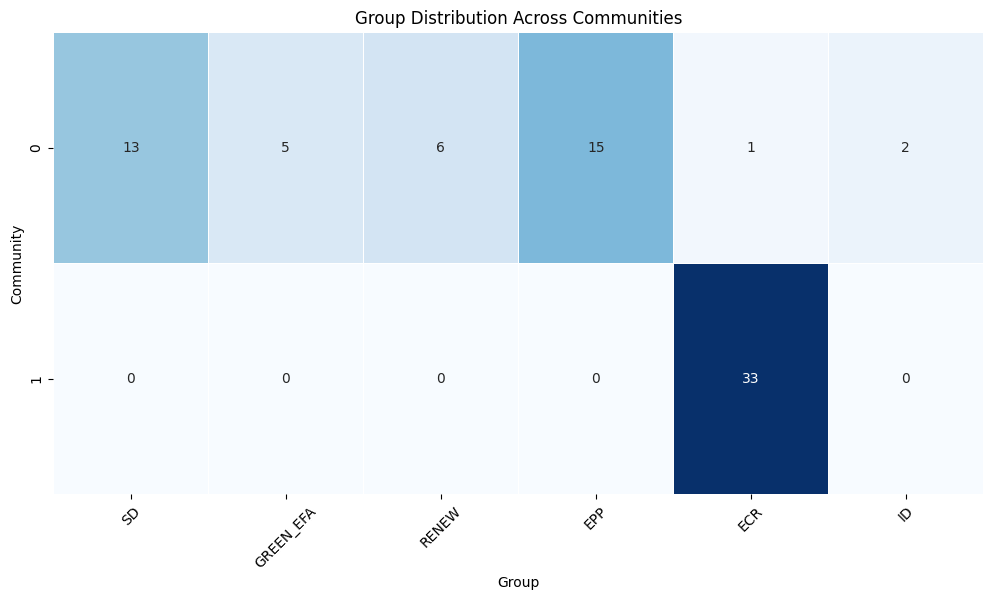

In [332]:
# Visualize the relevant communities obtained for all bills whose secondary subject is Information and communications in general (among any other possible subjects)
community_results_secondary_8 = analyze_communities(cleaned_edgelist_secondary_8)

plot_community_heatmap(community_results_secondary_8)

In [333]:
# Export the edges file as a CSV
cleaned_edgelist_secondary_8.to_csv("../matrices_and_networks/secondary_subjects/information_and_communications_in_general/edges.csv", index=False)

In [334]:
# Filter MEPs present in either Source or Target in cleaned_edgelist_secondary_8
unique_mep_ids = set(cleaned_edgelist_secondary_8['Source']).union(set(cleaned_edgelist_secondary_8['Target']))

# Filter group_memberships_single based on these MEP IDs
nodes_df = group_memberships_single[group_memberships_single['id_mep'].isin(unique_mep_ids)][['id_mep', 'group_code']]

# Save the filtered nodes dataframe to a CSV file in Gephi-compatible format
nodes_df.rename(columns={'id_mep': 'Id', 'group_code': 'Label'}, inplace=True)

# Add a "group_code" column that has the same values as the "Label" column to use as a partition in Gephi
nodes_df['group_code'] = nodes_df['Label']

# Save the nodes dataframe as a CSV file
nodes_df.to_csv("../matrices_and_networks/secondary_subjects/information_and_communications_in_general/nodes.csv", index=False)

In [335]:
# Define the list of optimal modularities across all selected secondary subjects
list_optimal_modularities = [optimal_modularity_secondary_1, optimal_modularity_secondary_2, optimal_modularity_secondary_3, optimal_modularity_secondary_4, 
                             optimal_modularity_secondary_5, optimal_modularity_secondary_6, optimal_modularity_secondary_7, optimal_modularity_secondary_8]

# Define the list of group modularities across all selected secondary subjects
list_group_modularities = [group_modularity_secondary_1, group_modularity_secondary_2, group_modularity_secondary_3, group_modularity_secondary_4, 
                             group_modularity_secondary_5, group_modularity_secondary_6, group_modularity_secondary_7, group_modularity_secondary_8]

# Define the list of nationality modularities across all selected secondary subjects
list_nationality_modularities = [nationality_modularity_secondary_1, nationality_modularity_secondary_2, nationality_modularity_secondary_3, nationality_modularity_secondary_4,
                              nationality_modularity_secondary_5, nationality_modularity_secondary_6, nationality_modularity_secondary_7, nationality_modularity_secondary_8]

# Define the list of group assortativity coefficients across all selected secondary subjects
list_group_assortativity = [group_assortativity_secondary_1, group_assortativity_secondary_2, group_assortativity_secondary_3, group_assortativity_secondary_4, 
                            group_assortativity_secondary_5, group_assortativity_secondary_6, group_assortativity_secondary_7, group_assortativity_secondary_8]

# Define the list of nationality assortativity coefficient across all selected secondary subjects
list_nationality_assortativity = [nationality_assortativity_secondary_1, nationality_assortativity_secondary_2, nationality_assortativity_secondary_3, nationality_assortativity_secondary_4,
                                  nationality_assortativity_secondary_5, nationality_assortativity_secondary_6, nationality_assortativity_secondary_7, nationality_assortativity_secondary_8]

# Define the list of average clustering coefficients across all selected secondary subjects
list_average_clustering_coefficients = [average_clustering_coefficient_secondary_1, average_clustering_coefficient_secondary_2, 
                                        average_clustering_coefficient_secondary_3, average_clustering_coefficient_secondary_4, 
                                        average_clustering_coefficient_secondary_5, average_clustering_coefficient_secondary_6, 
                                        average_clustering_coefficient_secondary_7, average_clustering_coefficient_secondary_8]

# Define the list of network densities across all selected secondary subjects
list_network_density = [network_density_secondary_1, network_density_secondary_2, network_density_secondary_3, network_density_secondary_4, 
                        network_density_secondary_5, network_density_secondary_6, network_density_secondary_7, network_density_secondary_8]

# Define the list of all percentages of remaining nodes across all selected secondary subjects
list_percentage_remaining_nodes = [percentage_remaining_nodes_secondary_1, percentage_remaining_nodes_secondary_2, percentage_remaining_nodes_secondary_3, percentage_remaining_nodes_secondary_4,
                                   percentage_remaining_nodes_secondary_5, percentage_remaining_nodes_secondary_6, percentage_remaining_nodes_secondary_7, percentage_remaining_nodes_secondary_8]

# Define the list total number of detected communities across all selected secondary subjects
list_number_of_detected_communities = [total_communities_secondary_1, total_communities_secondary_2, total_communities_secondary_3, total_communities_secondary_4,
                              total_communities_secondary_5, total_communities_secondary_6, total_communities_secondary_7, total_communities_secondary_8]

# Manually define the list of total relevant communities across all selected secondary subjects
list_of_number_relevant_communities = [4, 6, 6, 3, 3, 5, 3, 2]

                              
# Define the list of selected secondary subjects
primary_subjects = ["Budget of the Union", "Common foreign and security policy (CFSP)", "Environmental policy", 
                    "Social policy, social charter and protocol", "Agricultural policies and economies",
                    "Relations with third countries", "Common commercial policy in general", 
                    "Information and communications in general"]

# Define the number of bills per selected secondary subject
number_of_bills = [394, 247, 155, 124, 120, 116, 112, 102]

# Create a dictionary to store the data
data = {
    "Optimal modularity": list_optimal_modularities,
    "Group modularity": list_group_modularities,
    "Nationality modularity": list_nationality_modularities,
    "Group assortativity": list_group_assortativity,
    "Nationality assortativity": list_nationality_assortativity,
    "Average clustering coefficient": list_average_clustering_coefficients,
    "Network density": list_network_density,
    "% of remaining nodes": list_percentage_remaining_nodes,
    "Total detected communities": list_number_of_detected_communities,
    "Total relevant communities": list_of_number_relevant_communities,
    "Number of Bills": number_of_bills
}

# Create the dataframe with selected secondary subjects as index
df_network_features = pd.DataFrame(data, index=primary_subjects)

df_network_features

,Optimal modularity,Group modularity,Nationality modularity,Group assortativity,Nationality assortativity,Average clustering coefficient,Network density,% of remaining nodes,Total detected communities,Total relevant communities,Number of Bills
Budget of the Union,0.504458,0.255114,0.074737,0.310253,0.081479,0.682221,0.102919,62.589928,41,4,394
Common foreign and security policy (CFSP),0.741703,0.635725,0.163009,0.772522,0.178073,0.602981,0.043529,91.942446,18,6,247
Environmental policy,0.662063,0.579591,0.202764,0.741079,0.231355,0.617584,0.054335,63.021583,28,6,155
"Social policy, social charter and protocol",0.420610,0.324026,0.174815,0.478758,0.208613,0.594779,0.073947,49.640288,79,3,124
Agricultural policies and economies,0.396211,0.290384,0.072095,0.441826,0.079679,0.725322,0.126401,69.928058,55,3,120
Relations with third countries,0.749959,0.636173,0.238937,0.836074,0.268989,0.704995,0.069187,44.316547,16,5,116
Common commercial policy in general,0.700118,0.590275,0.237546,0.826773,0.268728,0.734583,0.069698,43.741007,14,3,112
Information and communications in general,0.789047,0.593548,0.447417,0.769854,0.528056,0.725634,0.056426,34.100719,27,2,102


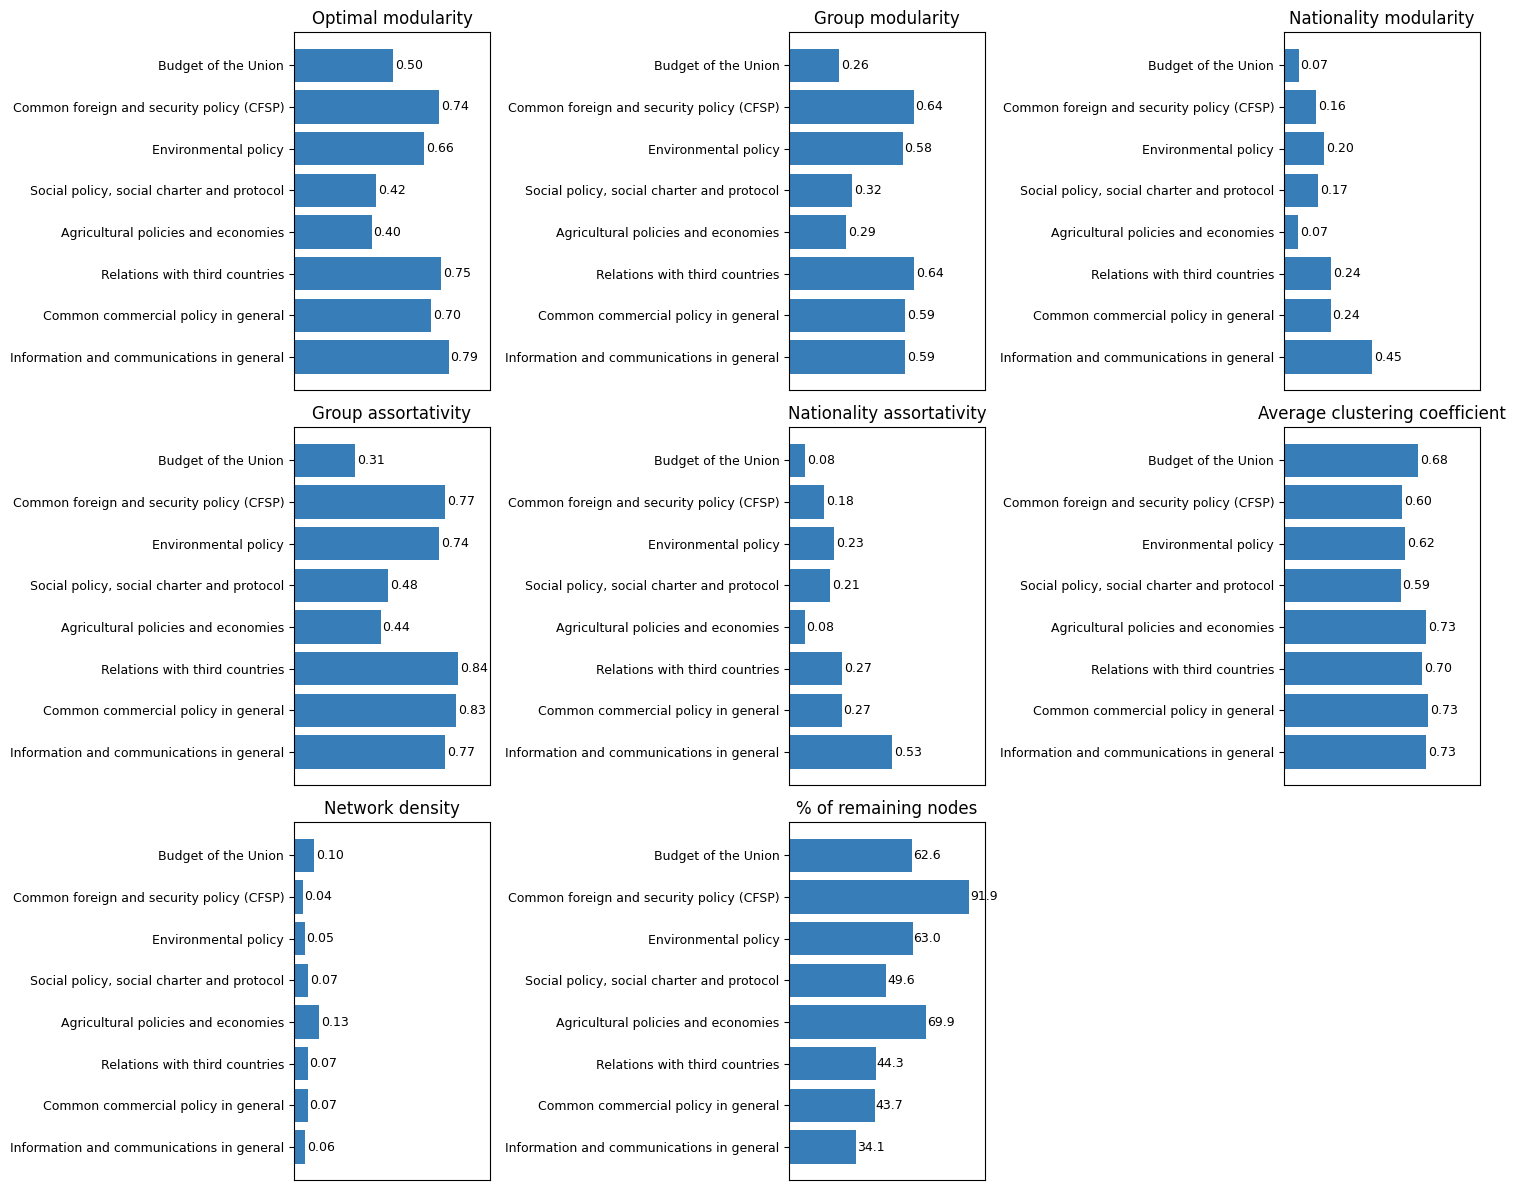

In [336]:
plot_network_statistics_barplots(df_network_features)